# Credit EDA Case Study - Risk Analytics
## Introduction
This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Understanding
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:
**The client with payment difficulties:** he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

**All other cases:** All other cases when the payment is paid on time.



When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

**Approved:** The Company has approved loan Application

**Cancelled:** The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

**Refused:** The company had rejected the loan (because the client does not meet their requirements etc.).

**Unused offer:**  Loan has been cancelled by the client but at different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.
## Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.
## Data Understanding
Download the dataset from below.
[https://drive.google.com/open?id=16RQztUqCfJOlbooHqYlJrp6Q7iL65uZB](http://)


This dataset has 3 files as explained below: 

 

1. *'application_data.csv'*  contains all the information of the client at the time of application.
The data is about whether a **client has payment difficulties**.

 

2. *'previous_application.csv'* contains information about the client’s previous loan data. It contains the data on whether the previous application had been **Approved, Cancelled, Refused or Unused** offer.

 

3. *'columns_description.csv'* is data dictionary which describes the meaning of the variables.

### Importing Libraries and Creating Functions

In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#function to add data labels to barcharts
def add_label_bar(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

#Function to get % counts of columns to create 100% stacked bar chart
def stack_bar(df,x,y,z):
    df1=df.pivot_table(index=x,columns=y,values=z,aggfunc='count')
    df2=df1.sum(axis=0)
    df3=df1/df2
    df3=df3.T
    return df3

In [3]:
palette_color = sns.color_palette('bright') #setting the color palette for the plots

### Loading files to Dataframes

In [4]:
appl_data=pd.read_csv('application_data.csv')
prev_appl=pd.read_csv('previous_application.csv')
col_desc=pd.read_csv('columns_description.csv',encoding='cp1252')
col_desc.drop(columns=col_desc.columns[0],axis=1,inplace=True)

#### Shape of Data

In [5]:
# printing the shape of the dataframes
print('Application Data \t\t: ',appl_data.shape)
print('Previous Application Data \t: ',prev_appl.shape)
print('Column Description Data \t: ',col_desc.shape)

Application Data 		:  (307511, 122)
Previous Application Data 	:  (1670214, 37)
Column Description Data 	:  (160, 4)


In [6]:
x=prev_appl.isnull().sum()

In [7]:
sum(sum([x>0]))

16

### Display first few lines of data

In [8]:
#setting display options
pd.set_option('display.max_rows',None,'display.max_columns',None,
              'display.max_colwidth',None)
#view first five rows of Application Data
display(appl_data.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [9]:
#view first five rows of Previous Application Data
display(prev_appl.head())

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# view the data of column description
col_desc

,Table,Row,Description,Special
0,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,application_data,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,application_data,CODE_GENDER,Gender of the client,NaN
4,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,application_data,AMT_ANNUITY,Loan annuity,NaN


### Data Types

In [11]:
#view data types of each column in Application Data
appl_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [12]:
#view data types of each column in Previous Application Data
prev_appl.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

### Analyze Missing Data

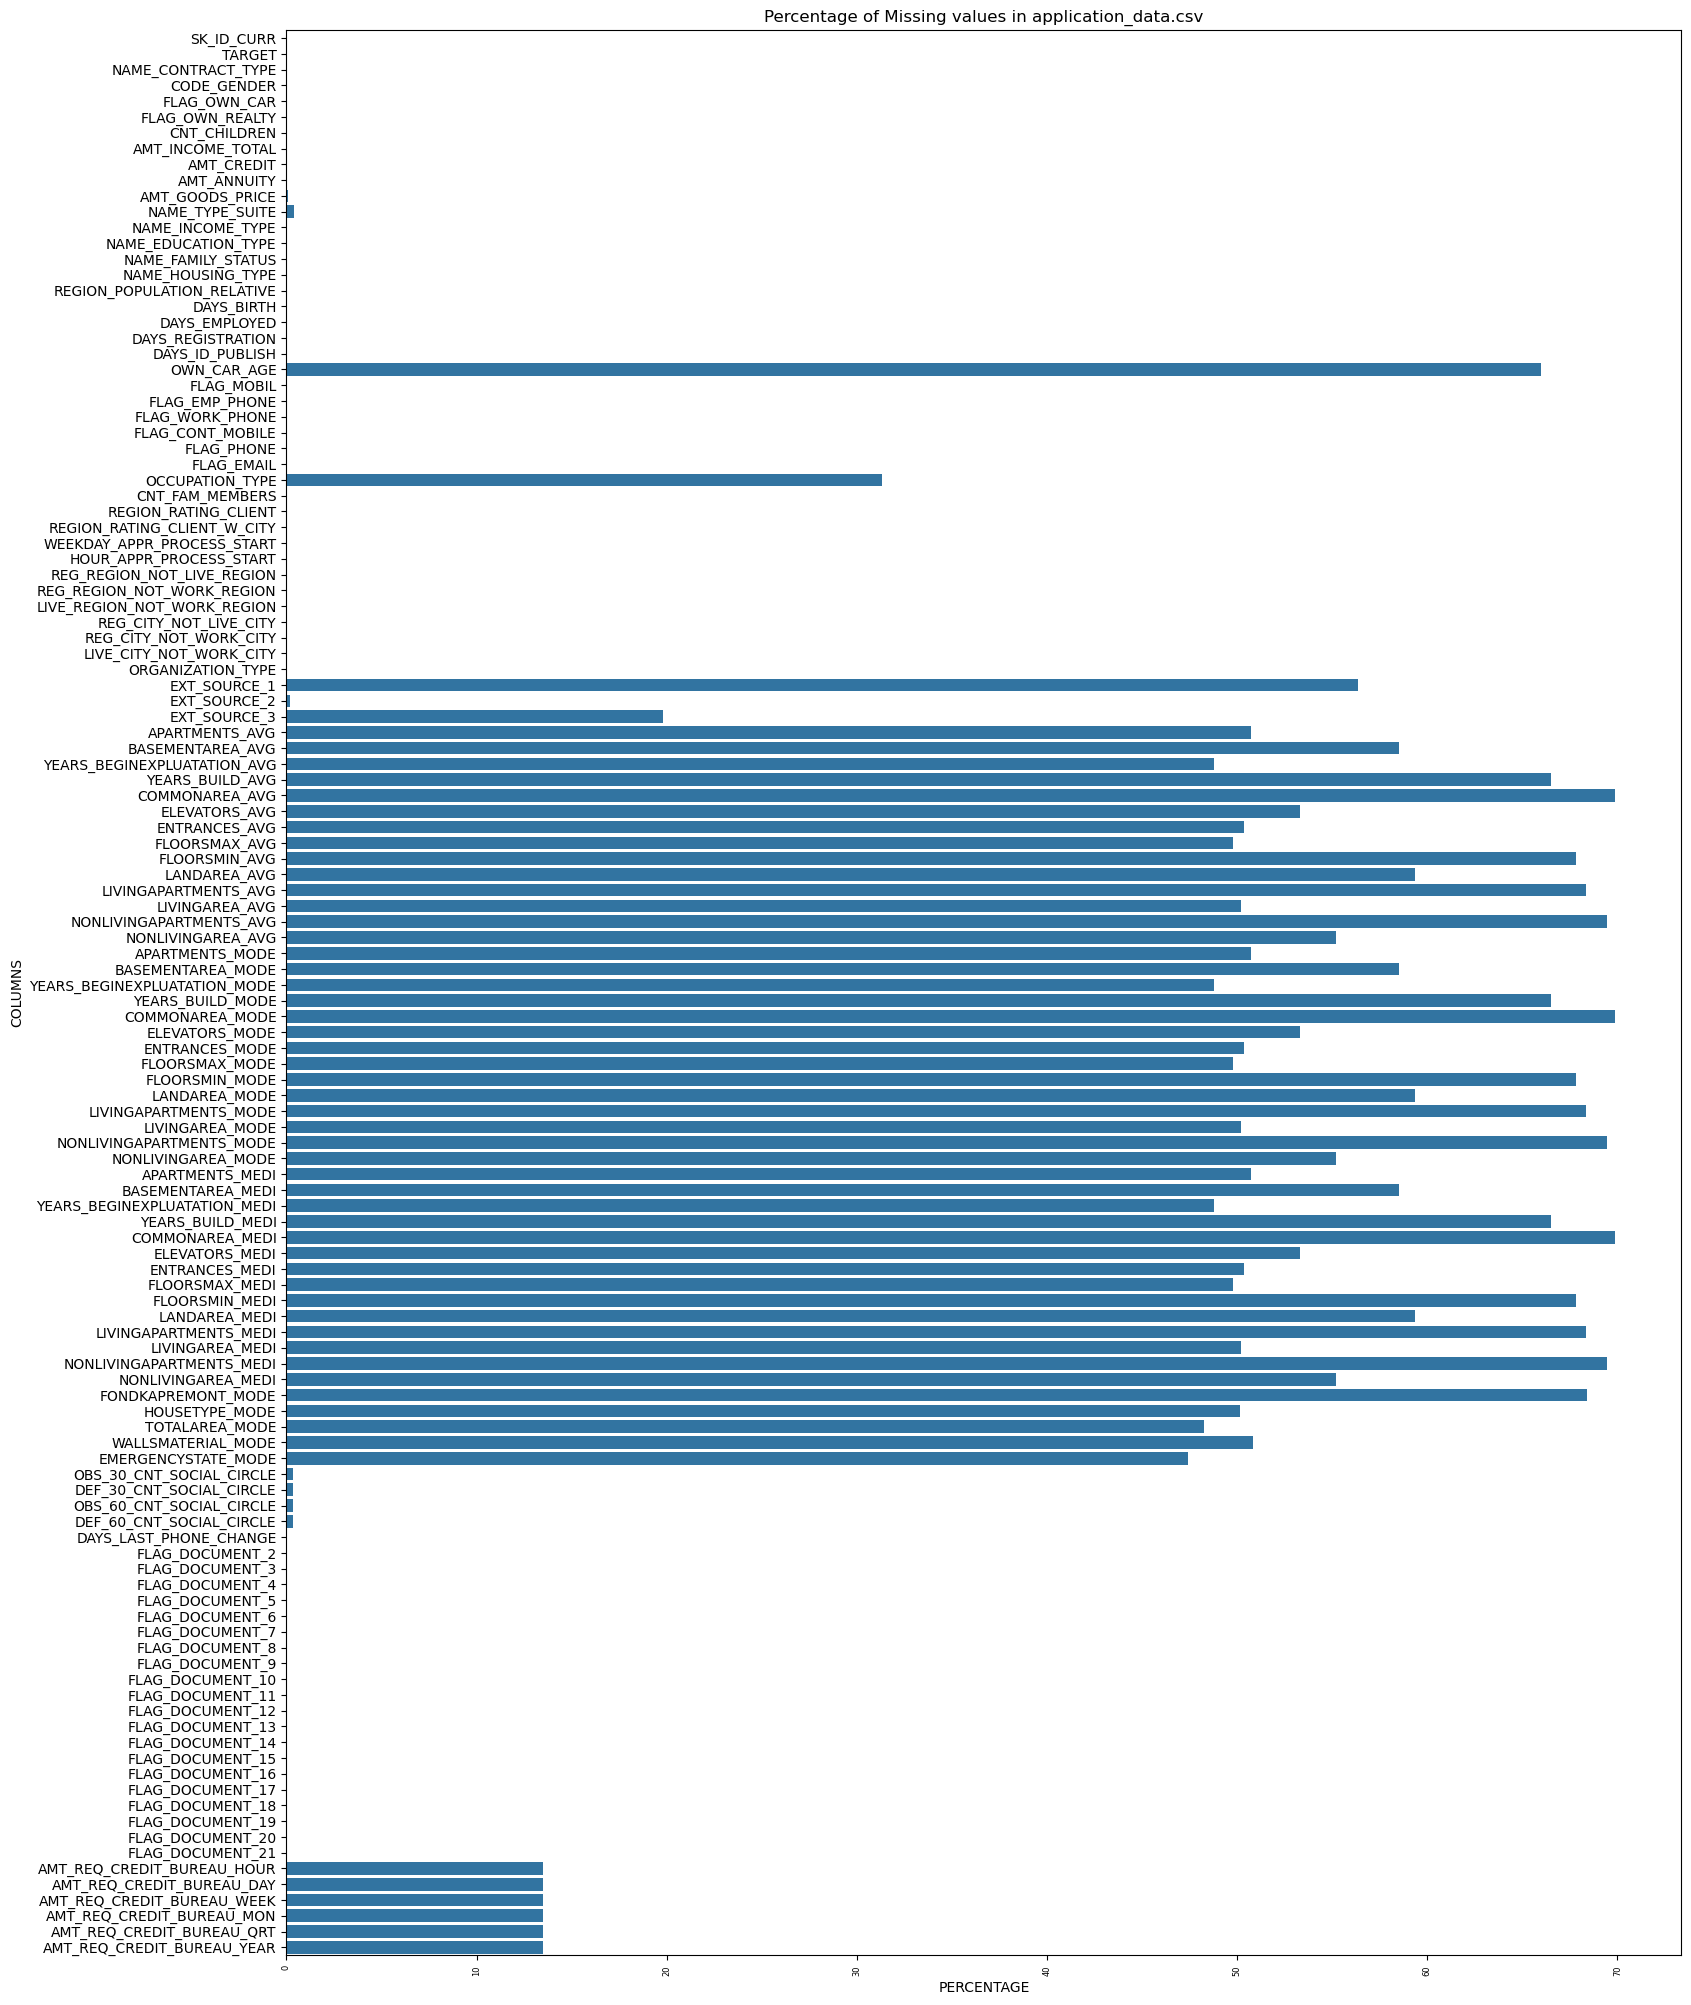

In [13]:
# view the missing data percentage for each column of the dataframe of
# Application Data
fig = plt.figure(figsize=(18,25))
ax=sns.barplot(appl_data.isnull().sum()/appl_data.shape[0]*100,orient='h')
plt.xticks(rotation =90,fontsize =6)
plt.title("Percentage of Missing values in application_data.csv")
plt.xlabel("PERCENTAGE")
plt.ylabel("COLUMNS")
plt.show()

From the above chart, we can see that there are many columns that have a missing data of more than the set threshold of 40%. Hence these columns can be dropped.

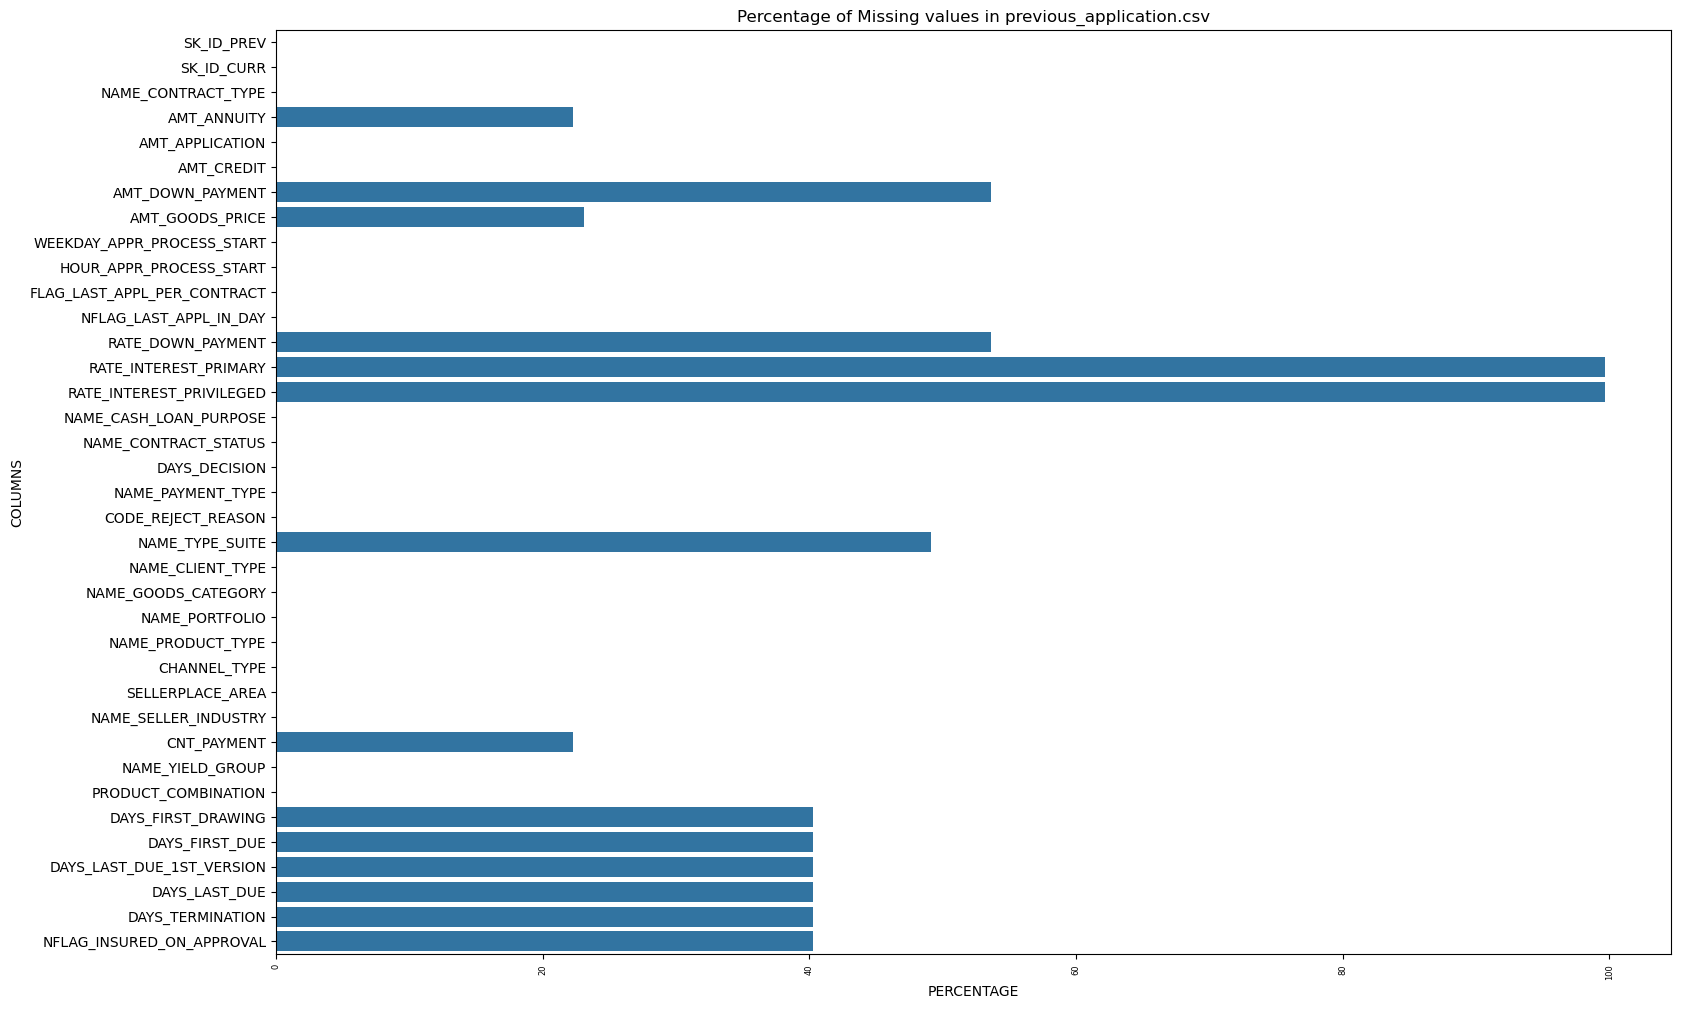

In [14]:
# view the missing data percentage for each column of the dataframe of Previous
# Application Data
fig = plt.figure(figsize=(18,12))
ax=sns.barplot(prev_appl.isnull().sum()/prev_appl.shape[0]*100,orient='h')
plt.xticks(rotation =90,fontsize =6)
plt.title("Percentage of Missing values in previous_application.csv")
plt.xlabel("PERCENTAGE")
plt.ylabel("COLUMNS")
plt.show()

### Data Preprocessing

In both the data sets there are some columns which are used to flag the applicants if they are meeting the said criterion. These columns are essentially categorical columns. But, the data in these columns is of numerical type (0 or 1). While performing EDA this may pose certain constraints. In order to address this, we can replace the <b>0 and 1</b> with <b>N and Y</b> respectively

The above mentioned data preprocessing will hold good for all the flag column except for the 'TARGET' column in application_data. In this column we can replace <b>0</b> and <b>1</b> with <b>repay</b> and <b>default</b> respectively

In [15]:
appl_data['TARGET'].replace({0:'repay',1:'default'},inplace=True)

In [16]:
flag_cols_appl_data=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL',
                     'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                     'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY',
                     'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
                     'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
                     'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16',
                     'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [17]:
for i in range(len(flag_cols_appl_data)):
    appl_data[flag_cols_appl_data[i]].replace({0:'N',1:'Y'},inplace=True)    

In [18]:
prev_appl['NFLAG_LAST_APPL_IN_DAY'].replace({0:'N',1:'Y'},inplace=True)

### Handling Missing Values - application_data.csv

#### Dropping Columns

In [19]:
cut_off=40 # settign threshold of 40% for missing data

In [20]:
#identifying the column names of the columns having missing data >40%
appl_data_miss_cols=list(
    appl_data.columns[appl_data.isnull().sum()/appl_data.shape[0]*100>cut_off])
print('No. of columns in Application Data with missing data more than 40%\t:',
      len(appl_data_miss_cols), '\n\n')
appl_data_miss_cols

No. of columns in Application Data with missing data more than 40%	: 49 




['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [21]:
#dropping the columns haivng missing data greater than 40%
appl_data.drop(appl_data_miss_cols,axis=1,inplace=True)


Now let us see, for the remaining data, what is the missing data % for each column in each dataset

In [22]:
#viewing how much % data is missing for the remaining columns
appl_data_miss_cols=appl_data.isnull().sum()/appl_data.shape[0]*100
appl_data_miss_cols=appl_data_miss_cols.loc[lambda x:x!=0]
print('Columns with missing data after dropping the columns beyond threshold of 40%\n')
print(appl_data_miss_cols)

Columns with missing data after dropping the columns beyond threshold of 40%

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
OCCUPATION_TYPE               31.345545
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64


### Imputation

<b>AMT_ANNUITY</b>

In [23]:
print('Missing value count\t:',appl_data['AMT_ANNUITY'].isnull().sum())

Missing value count	: 12


In [24]:
appl_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

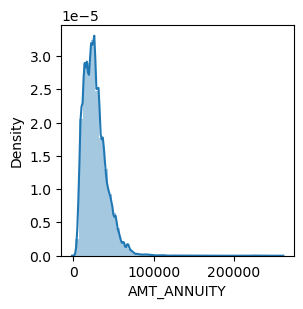

In [25]:
fig=plt.figure(figsize=(3,3))
sns.distplot(appl_data['AMT_ANNUITY'])
plt.show()

Based on the above distribution plot, it is suggested to fill the missing values with median

In [26]:
appl_data['AMT_ANNUITY'].fillna(value=appl_data['AMT_ANNUITY'].median(),inplace=True)

<b>AMT_GOODS_PRICE</b>

In [27]:
print('Missing value count\t:',appl_data['AMT_GOODS_PRICE'].isnull().sum())

Missing value count	: 278


In [28]:
appl_data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

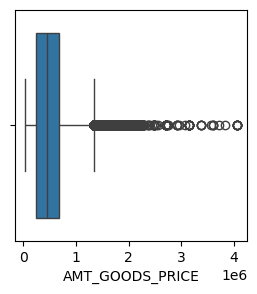

In [29]:
fig=plt.figure(figsize=(3,3))
sns.boxplot(x=appl_data['AMT_GOODS_PRICE'])
plt.show()

Based on the above distribution plot, it is suggested to fill the missing values with median

In [30]:
appl_data['AMT_GOODS_PRICE'].fillna(value=appl_data['AMT_GOODS_PRICE'].median(),inplace=True)

<b>NAME_TYPE_SUITE</b>

In [31]:
print('Missing value count\t:',appl_data['NAME_TYPE_SUITE'].isnull().sum())

Missing value count	: 1292


In [32]:
appl_data['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

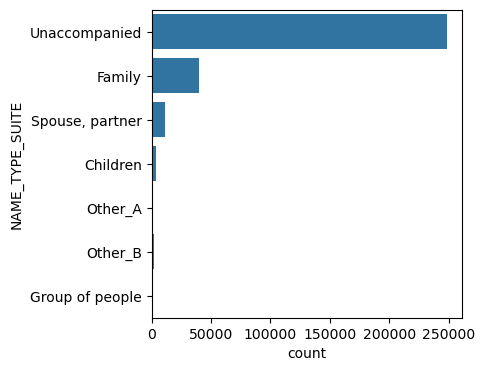

In [33]:
fig=plt.figure(figsize=(4,4))
sns.countplot(y=appl_data['NAME_TYPE_SUITE'])
plt.show()

As the data type is categorical, mode can be used to fill the missing values

In [34]:
appl_data['NAME_TYPE_SUITE'].fillna(value=appl_data['NAME_TYPE_SUITE'].mode()[0],inplace=True)

<b>CNT_FAM_MEMBERS</b>

In [35]:
print('Missing value count\t:',appl_data['CNT_FAM_MEMBERS'].isnull().sum())

Missing value count	: 2


In [36]:
appl_data['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

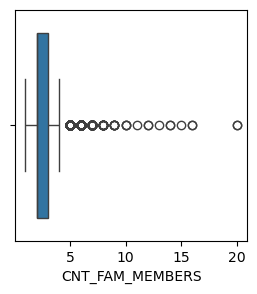

In [37]:
fig=plt.figure(figsize=(3,3))
sns.boxplot(x=appl_data['CNT_FAM_MEMBERS'])
plt.show()


Based on the above distribution plot, it is suggested to fill the missing values with median

In [38]:
appl_data['CNT_FAM_MEMBERS'].fillna(value=appl_data['CNT_FAM_MEMBERS'].median(),inplace=True)

<b>EXT_SOURCE_2</b>

In [39]:
print('Missing value count\t:',appl_data['EXT_SOURCE_2'].isnull().sum())

Missing value count	: 660


In [40]:
appl_data['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

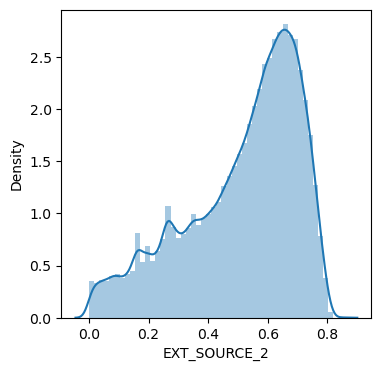

In [41]:
fig=plt.figure(figsize=(4,4))
sns.distplot(appl_data['EXT_SOURCE_2'])
plt.show()


Based on the above distribution plot, it is suggested to fill the missing values with median

In [42]:
appl_data['EXT_SOURCE_2'].fillna(value=appl_data['EXT_SOURCE_2'].median(),inplace=True)

<b>EXT_SOURCE_3</b>

In [43]:
print('Missing value count\t:',appl_data['EXT_SOURCE_3'].isnull().sum())

Missing value count	: 60965


In [44]:
appl_data['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

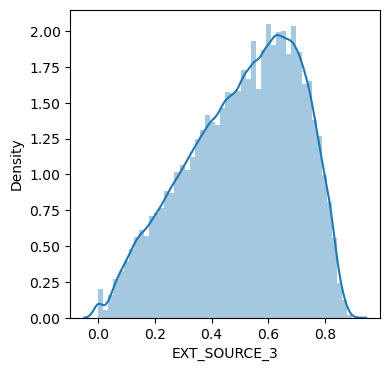

In [45]:
fig=plt.figure(figsize=(4,4))
sns.distplot(appl_data['EXT_SOURCE_3'])
plt.show()


Based on the above distribution plot, it is suggested to fill the missing values with median

In [46]:
appl_data['EXT_SOURCE_3'].fillna(value=appl_data['EXT_SOURCE_3'].median(),inplace=True)

<b>OBS_30_CNT_SOCIAL_CIRCLE</b>

In [47]:
print('Missing value count\t:',appl_data['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum())

Missing value count	: 1021


In [48]:
appl_data['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

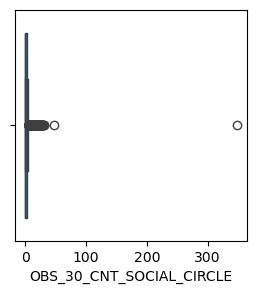

In [49]:
fig=plt.figure(figsize=(3,3))
sns.boxplot(x=appl_data['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.show()


Based on the above distribution plot, it is suggested to fill the missing values with median

In [50]:
appl_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(value=appl_data['OBS_30_CNT_SOCIAL_CIRCLE'].median(),inplace=True)

<b>DEF_30_CNT_SOCIAL_CIRCLE</b>

In [51]:
print('Missing value count\t:',appl_data['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum())

Missing value count	: 1021


In [52]:
appl_data['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

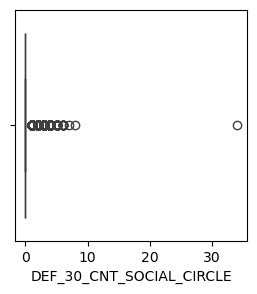

In [53]:
fig=plt.figure(figsize=(3,3))
sns.boxplot(x=appl_data['DEF_30_CNT_SOCIAL_CIRCLE'])
plt.show()


Based on the above distribution plot, it is suggested to fill the missing values with median

In [54]:
appl_data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(value=appl_data['DEF_30_CNT_SOCIAL_CIRCLE'].median(),inplace=True)

<b>OBS_60_CNT_SOCIAL_CIRCLE</b>

In [55]:
print('Missing value count\t:',appl_data['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum())

Missing value count	: 1021


In [56]:
appl_data['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

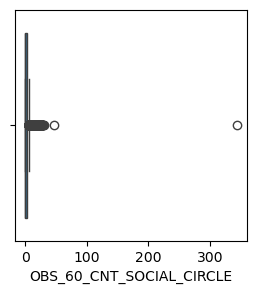

In [57]:
fig=plt.figure(figsize=(3,3))
sns.boxplot(x=appl_data['OBS_60_CNT_SOCIAL_CIRCLE'])
plt.show()


Based on the above distribution plot, it is suggested to fill the missing values with median

In [58]:
appl_data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(value=appl_data['OBS_60_CNT_SOCIAL_CIRCLE'].median(),inplace=True)

<b>DEF_60_CNT_SOCIAL_CIRCLE</b>

In [59]:
print('Missing value count\t:',appl_data['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum())

Missing value count	: 1021


In [60]:
appl_data['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

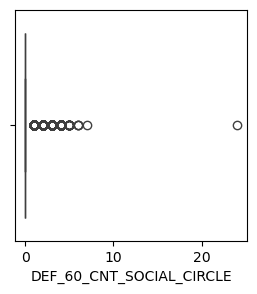

In [61]:
fig=plt.figure(figsize=(3,3))
sns.boxplot(x=appl_data['DEF_60_CNT_SOCIAL_CIRCLE'])
plt.show()


Based on the above distribution plot, it is suggested to fill the missing values with median

In [62]:
appl_data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(value=appl_data['DEF_60_CNT_SOCIAL_CIRCLE'].median(),inplace=True)

<b>DAYS_LAST_PHONE_CHANGE</b>

In [63]:
print('Missing value count\t:',appl_data['DAYS_LAST_PHONE_CHANGE'].isnull().sum())

Missing value count	: 1


In [64]:
appl_data['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

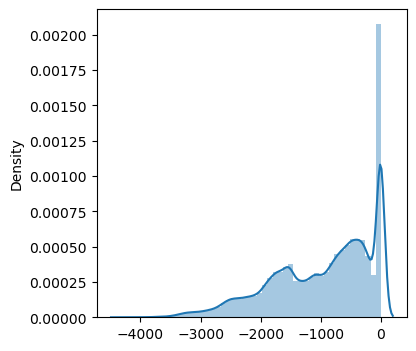

In [65]:
fig=plt.figure(figsize=(4,4))
sns.distplot(x=appl_data['DAYS_LAST_PHONE_CHANGE'])
plt.show()


Based on the above distribution plot, it is suggested to fill the missing values with median

In [66]:
appl_data['DAYS_LAST_PHONE_CHANGE'].fillna(value=appl_data['DAYS_LAST_PHONE_CHANGE'].median(),inplace=True)

<b>AMT_REQ_CREDIT_BUREAU_HOUR</b>

In [67]:
print('Missing value count\t:',appl_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum())

Missing value count	: 41519


In [68]:
appl_data['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

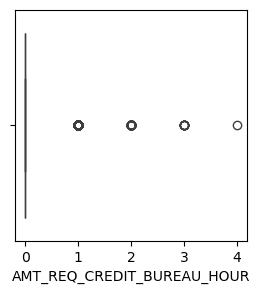

In [69]:
fig=plt.figure(figsize=(3,3))
sns.boxplot(x=appl_data['AMT_REQ_CREDIT_BUREAU_HOUR'])
plt.show()


Based on the above distribution plot, it is suggested to fill the missing values with median

In [70]:
appl_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(value=appl_data['AMT_REQ_CREDIT_BUREAU_HOUR'].median(),inplace=True)

<b>AMT_REQ_CREDIT_BUREAU_DAY</b>

In [71]:
print('Missing value count\t:',appl_data['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum())

Missing value count	: 41519


In [72]:
appl_data['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

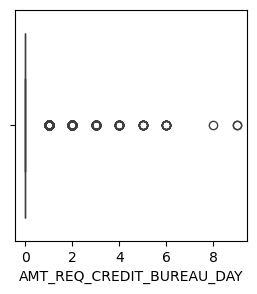

In [73]:
fig=plt.figure(figsize=(3,3))
sns.boxplot(x=appl_data['AMT_REQ_CREDIT_BUREAU_DAY'])
plt.show()


Based on the above distribution plot, it is suggested to fill the missing values with median

In [74]:
appl_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(value=appl_data['AMT_REQ_CREDIT_BUREAU_DAY'].median(),inplace=True)

<b>AMT_REQ_CREDIT_BUREAU_WEEK</b>

In [75]:
print('Missing value count\t:',appl_data['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum())

Missing value count	: 41519


In [76]:
appl_data['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

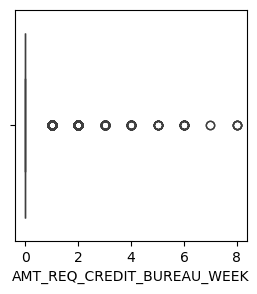

In [77]:
fig=plt.figure(figsize=(3,3))
sns.boxplot(x=appl_data['AMT_REQ_CREDIT_BUREAU_WEEK'])
plt.show()


Based on the above distribution plot, it is suggested to fill the missing values with median

In [78]:
appl_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(value=appl_data['AMT_REQ_CREDIT_BUREAU_WEEK'].median(),inplace=True)

<b>AMT_REQ_CREDIT_BUREAU_MON<b>

In [79]:
print('Missing value count\t:',appl_data['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum())

Missing value count	: 41519


In [80]:
appl_data['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

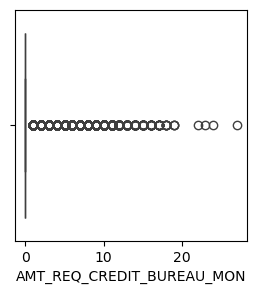

In [81]:
fig=plt.figure(figsize=(3,3))
sns.boxplot(x=appl_data['AMT_REQ_CREDIT_BUREAU_MON'])
plt.show()


Based on the above distribution plot, it is suggested to fill the missing values with median

In [82]:
appl_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(value=appl_data['AMT_REQ_CREDIT_BUREAU_MON'].median(),inplace=True)

<b>AMT_REQ_CREDIT_BUREAU_QRT</b>

In [83]:
print('Missing value count\t:',appl_data['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum())

Missing value count	: 41519


In [84]:
appl_data['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

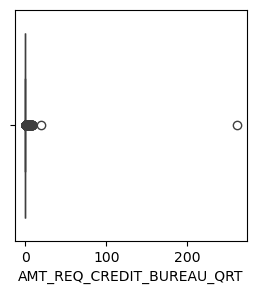

In [85]:
fig=plt.figure(figsize=(3,3))
sns.boxplot(x=appl_data['AMT_REQ_CREDIT_BUREAU_QRT'])
plt.show()


Based on the above distribution plot, it is suggested to fill the missing values with median

In [86]:
appl_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(value=appl_data['AMT_REQ_CREDIT_BUREAU_QRT'].median(),inplace=True)

<b>AMT_REQ_CREDIT_BUREAU_YEAR</b>

In [87]:
print('Missing value count\t:',appl_data['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum())

Missing value count	: 41519


In [88]:
appl_data['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

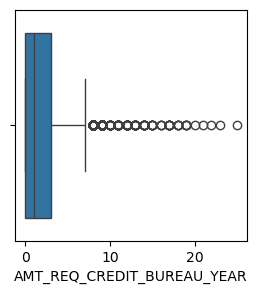

In [89]:
fig=plt.figure(figsize=(3,3))
sns.boxplot(x=appl_data['AMT_REQ_CREDIT_BUREAU_YEAR'])
plt.show()


Based on the above distribution plot, it is suggested to fill the missing values with median

In [90]:
appl_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(value=appl_data['AMT_REQ_CREDIT_BUREAU_YEAR'].median(),inplace=True)

<b>Occupation Type</b>

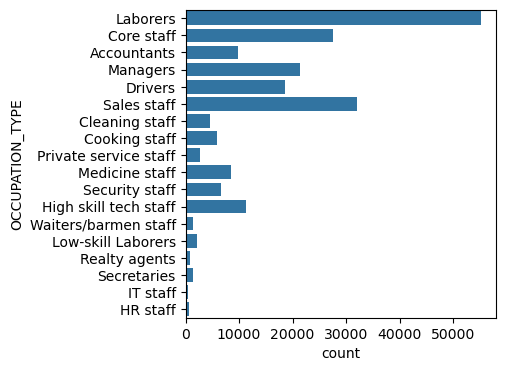

In [91]:
#sns.color_palette(palette='Greens')
fig=plt.figure(figsize=(4,4))
sns.countplot(appl_data['OCCUPATION_TYPE'])

plt.show()

Since this column contains categorical data, we can use mode of the data to fill the missing values.<br><br>
However, in general the income of the applicant is mostly dependent on the type of occupation. Since, the income data for all the applicants is available, we can use this income data to arrive at the occupation type and fill the missing value.

Now lets analyse the salary distribution for each occupation type.

In [92]:
df=appl_data[['AMT_INCOME_TOTAL','OCCUPATION_TYPE']]
df_pivot=pd.pivot_table(data=df,index='OCCUPATION_TYPE',values='AMT_INCOME_TOTAL',aggfunc='mean')
df_pivot = df_pivot.reindex(df_pivot.sort_values(by='AMT_INCOME_TOTAL', ascending=True).index)
df_pivot

,AMT_INCOME_TOTAL
OCCUPATION_TYPE,
Cleaning staff,130790.895551
Low-skill Laborers,133228.001911
Cooking staff,138396.508176
Waiters/barmen staff,144272.583828
Security staff,149662.695953
Medicine staff,149709.643434
Sales staff,152302.874710
Secretaries,160541.662069
Laborers,166357.482525


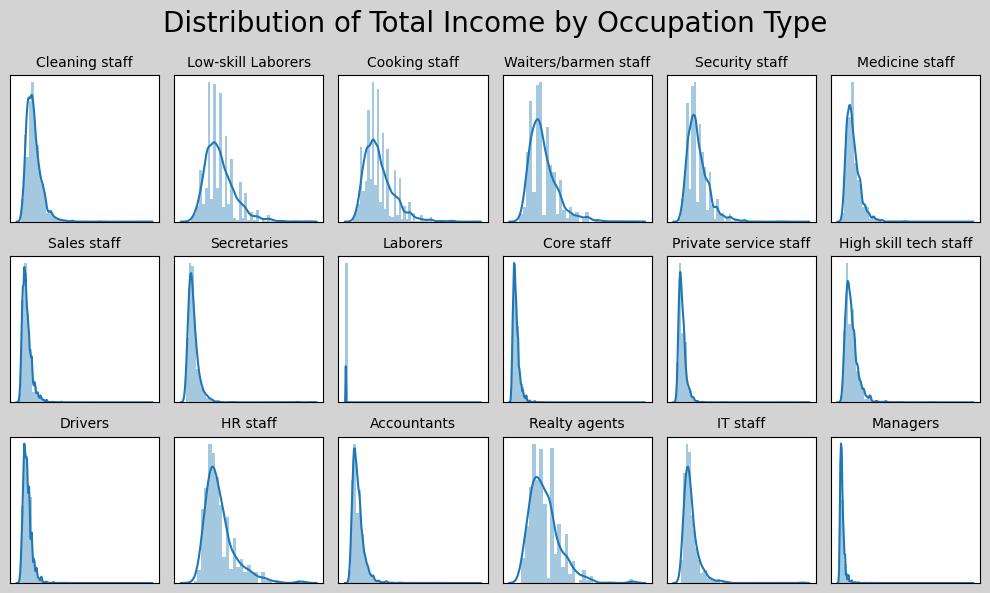

In [93]:
fig=plt.figure(figsize=(10,6))
fig.set_facecolor("lightgrey")
for i in range(len(df_pivot.index)):
  plt.subplot(3,6,i+1)
  sns.distplot(appl_data[appl_data['OCCUPATION_TYPE']==df_pivot.index[i]]['AMT_INCOME_TOTAL'])
  plt.title(df_pivot.index[i],fontsize=10)
  plt.xlabel("")
  plt.ylabel("")
  plt.xticks([])
  plt.yticks([])
plt.suptitle('Distribution of Total Income by Occupation Type', fontsize=20)
plt.tight_layout()
plt.show()

From the above charts, we can see that the salary distribution across each occupation type is skewed right.

Now for the applicants where the occupation type is missing, we will fill the occupation type by comapring the applicant's salary with mean income of each occupation type and accordingly fill the occupation type

In [94]:
for i,row in df[['AMT_INCOME_TOTAL','OCCUPATION_TYPE']].iterrows():
  try:
    float(row['OCCUPATION_TYPE'])
    res=True
    df.loc[i,'OCCUPATION_TYPE']=df_pivot[df_pivot['AMT_INCOME_TOTAL']>=df.iloc[i]['AMT_INCOME_TOTAL']].index[0]
  except:
    res=False
df['OCCUPATION_TYPE'].fillna('Managers',inplace=True)
appl_data['OCCUPATION_TYPE']=df['OCCUPATION_TYPE']

### Handling Missing Values - previous_application.csv

#### Dropping Columns

In [95]:
#identifying the column names of the columns having missing data >40%
prev_appl_miss_cols=list(
    prev_appl.columns[prev_appl.isnull().sum()/prev_appl.shape[0]*100>cut_off])
print('No. of columns in Previous Application Data with missing data more than 40%\t:',
      len(prev_appl_miss_cols), '\n\n')
prev_appl_miss_cols

No. of columns in Previous Application Data with missing data more than 40%	: 11 




['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [96]:
#dropping the columns haivng missing data greater than 40%
prev_appl.drop(prev_appl_miss_cols,axis=1,inplace=True)


Now let us see, for the remaining data, what is the missing data % for each column in each dataset

In [97]:
#viewing how much % data is missing for the remaining columns
prev_appl_miss_cols=prev_appl.isnull().sum()/prev_appl.shape[0]*100
prev_appl_miss_cols=prev_appl_miss_cols.loc[lambda x:x!=0]
print('Columns with missing data after dropping the columns beyond threshold of 40%\n')
print(prev_appl_miss_cols)

Columns with missing data after dropping the columns beyond threshold of 40%

AMT_ANNUITY            22.286665
AMT_CREDIT              0.000060
AMT_GOODS_PRICE        23.081773
CNT_PAYMENT            22.286366
PRODUCT_COMBINATION     0.020716
dtype: float64


### Imputation

<b>AMT_ANNUITY</b>

In [98]:
print('Missing value count\t:',prev_appl['AMT_ANNUITY'].isnull().sum())

Missing value count	: 372235


In [99]:
prev_appl['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

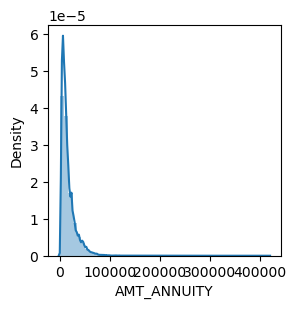

In [100]:
fig=plt.figure(figsize=(3,3))
sns.distplot(prev_appl['AMT_ANNUITY'])
plt.show()

Based on the above distribution plot, it is suggested to fill the missing values with median

In [101]:
prev_appl['AMT_ANNUITY'].fillna(value=prev_appl['AMT_ANNUITY'].median(),inplace=True)

<b>AMT_GOODS_PRICE</b>

In [102]:
print('Missing value count\t:',prev_appl['AMT_GOODS_PRICE'].isnull().sum())

Missing value count	: 385515


In [103]:
prev_appl['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

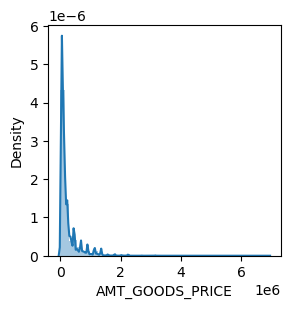

In [104]:
fig=plt.figure(figsize=(3,3))
sns.distplot(prev_appl['AMT_GOODS_PRICE'])
plt.show()

Based on the above distribution plot, it is suggested to fill the missing values with median

In [105]:
prev_appl['AMT_GOODS_PRICE'].fillna(value=prev_appl['AMT_GOODS_PRICE'].median(),inplace=True)

<b>CNT_PAYMENT</b>

In [106]:
print('Missing value count\t:',prev_appl['CNT_PAYMENT'].isnull().sum())

Missing value count	: 372230


In [107]:
prev_appl['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

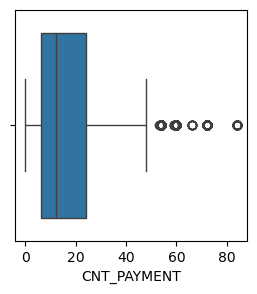

In [108]:
fig=plt.figure(figsize=(3,3))
sns.boxplot(x=prev_appl['CNT_PAYMENT'])
plt.show()

Based on the above distribution plot, it is suggested to fill the missing values with median

In [109]:
prev_appl['CNT_PAYMENT'].fillna(value=prev_appl['CNT_PAYMENT'].median(),inplace=True)

<b>PRODUCT_COMBINATION</b>

In [110]:
print('Missing value count\t:',prev_appl['PRODUCT_COMBINATION'].isnull().sum())

Missing value count	: 346


In [111]:
prev_appl['PRODUCT_COMBINATION'].describe()

count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object

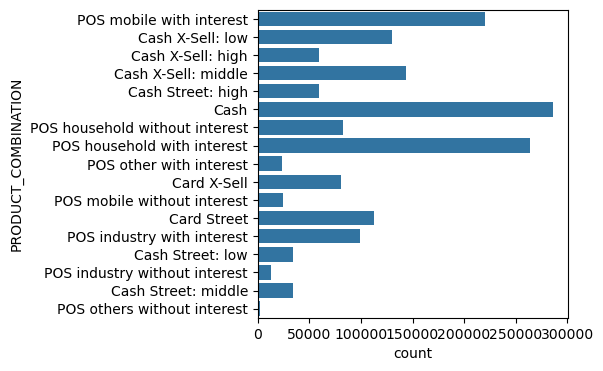

In [112]:
fig=plt.figure(figsize=(4,4))
sns.countplot(y=prev_appl['PRODUCT_COMBINATION'])
plt.show()

As the data type is categorical, mode can be used to fill the missing values

In [113]:
prev_appl['PRODUCT_COMBINATION'].fillna(value=prev_appl['PRODUCT_COMBINATION'].mode()[0],inplace=True)

### Data Correction - Handling Negative and Impractical Values

In both the data sets, there are certain columns showing days like DAYS_BIRTH, DAYS_ID_PUBLISH, etc. Upon observing these columns the values are either negative or very high like more 365000 days (1000 years). As both the cases are not possible, we need to convert the negative values to absolute values and we also need to analyse further on the more than 365000 days why there is such an impractical data point and correct it accordingly.

<b>DAYS_BIRTH</b>

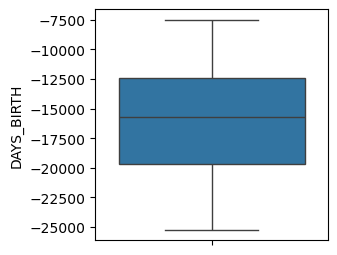

In [114]:
fig=plt.figure(figsize=(3,3))
sns.boxplot(appl_data['DAYS_BIRTH'])
plt.show()

Based on the above box plot, the values in DAYS_BIRTH column are in the range of -7500 to -25000 days which is approx -20 to 68 years, which are realistic and the only deviation is that these are negative. So, we need to convert these negative values to absolute.

In [115]:
appl_data['DAYS_BIRTH']=abs(appl_data['DAYS_BIRTH'])

<B>DAYS_EMPLOYED</b>

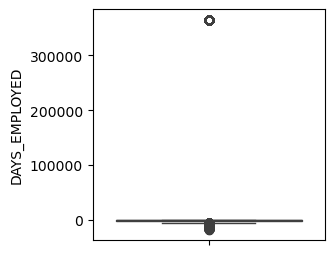

In [116]:
fig=plt.figure(figsize=(3,3))
sns.boxplot(appl_data['DAYS_EMPLOYED'])
plt.show()

From the above plot, upon initial observation, some of the values in the DAYS_EMPLOYED column are more than 365000 days which is 1000 years.
Now let's have a look at the NAME_INCOME_TYPE column for which the DAYS_EMPLOYED column have this wierd values

In [117]:
appl_data[appl_data['DAYS_EMPLOYED']>365000]['NAME_INCOME_TYPE'].unique()

array(['Pensioner', 'Unemployed'], dtype=object)

So, the DAYS_EMPLOYED column has values of more than 365000 days for those applicants whose NAME_INCOME_TYPE is either a <b>Pensioner</b> or <b>Unemployed</b>. Since the pensioners and unemployed have zero days of employment, the system may have generated this value for zero days. So, it would be appropriate to replace this impractically higher value with zero.

In [118]:
appl_data.loc[appl_data['DAYS_EMPLOYED']>365000,'DAYS_EMPLOYED']=0

After applying the above correction, the distribution of the DAYS_EMPLOYED will be as follows

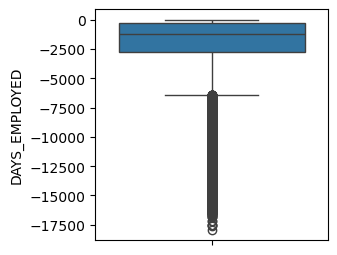

In [119]:
fig=plt.figure(figsize=(3,3))
sns.boxplot(appl_data['DAYS_EMPLOYED'])
plt.show()

Now, the number of days employed is in the range of 0 to ~17500 days which seem practical. But all these values are negative which can be replaced with the absolute values

In [120]:
appl_data['DAYS_EMPLOYED']=abs(appl_data['DAYS_EMPLOYED'])

<b>DAYS_REGISTRATION</b>

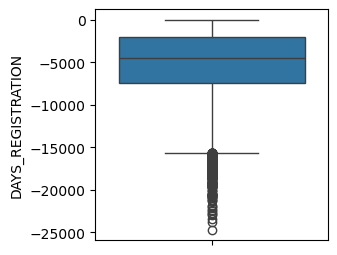

In [121]:
fig=plt.figure(figsize=(3,3))
sns.boxplot(appl_data['DAYS_REGISTRATION'])
plt.show()

Similar to the previous columns, we can replace the negative values with absolutes

In [122]:
appl_data['DAYS_REGISTRATION']=abs(appl_data['DAYS_REGISTRATION'])

<b>DAYS_ID_PUBLISH</b>

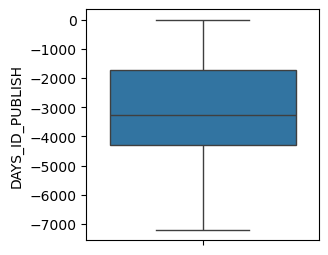

In [123]:
fig=plt.figure(figsize=(3,3))
sns.boxplot(appl_data['DAYS_ID_PUBLISH'])
plt.show()

Similar to the previous columns, we can replace the negative values with absolutes

In [124]:
appl_data['DAYS_ID_PUBLISH']=abs(appl_data['DAYS_ID_PUBLISH'])

<b>TARGET Variable</b>

Since, the TARGET column has numerical values of either 0 or 1, it will be difficult to perform any categorical analysis. To address the difficulty, we can replace these 0s and 1s with strings <b>'repay'</b> and <b>'default'</b>

In [125]:
appl_data['TARGET'].replace({0:'repay',1:'default'},inplace=True)

<b>DAYS_DECISION - Previous Application</b>

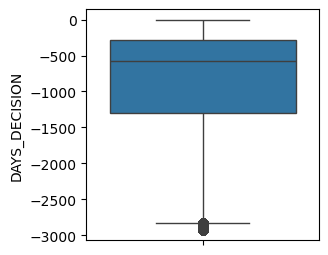

In [126]:
fig=plt.figure(figsize=(3,3))
sns.boxplot(prev_appl['DAYS_DECISION'])
plt.show()

In [127]:
prev_appl['DAYS_DECISION']=abs(prev_appl['DAYS_DECISION'])

## EDA on Application Data

### Identifying Numerical & Categorical Columns

In [128]:
appl_data_cat_cols=appl_data.columns[appl_data.dtypes=='object']
appl_data_num_cols=appl_data.columns[(appl_data.dtypes=='int64') | (appl_data.dtypes=='float64')][2:]
print('Categorical Columns\n\n')
print(appl_data_cat_cols)
print('\n\nNumerical Columns\n\n')
print(appl_data_num_cols)

Categorical Columns


Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_

### Distribution of Target

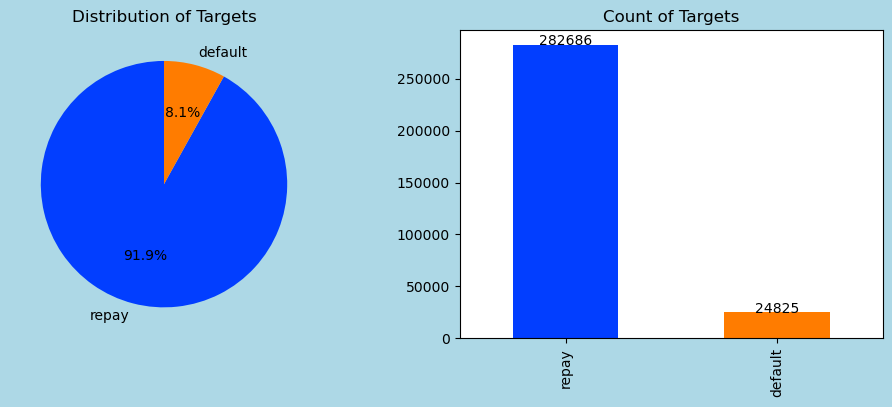

In [129]:
fig=plt.figure(figsize=(12,4))
fig.set_facecolor("lightblue")
ax=plt.subplot(121)
appl_data['TARGET'].value_counts().plot.pie(
    colors=palette_color,labels=appl_data['TARGET'].value_counts().index,
    autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Targets')
plt.ylabel("")

ax=plt.subplot(122)
ax = appl_data["TARGET"].value_counts().plot(kind="bar",color=palette_color)
plt.title('Count of Targets')
add_label_bar(appl_data['TARGET'].value_counts().index,appl_data['TARGET'].value_counts())
plt.xlabel("")
plt.show()

<b>Inference</b>

From the above plots, 91.9% of the applicants are likely to replay and 8.1% of them are the risk fo default

### Distribution of Categorical Variables with two categories

In [130]:
cat_dict_2={'Contract Type':'NAME_CONTRACT_TYPE',
            'Gender':'CODE_GENDER',
            'Car Ownership':'FLAG_OWN_CAR',
            'House/Flat Ownership':'FLAG_OWN_REALTY'}

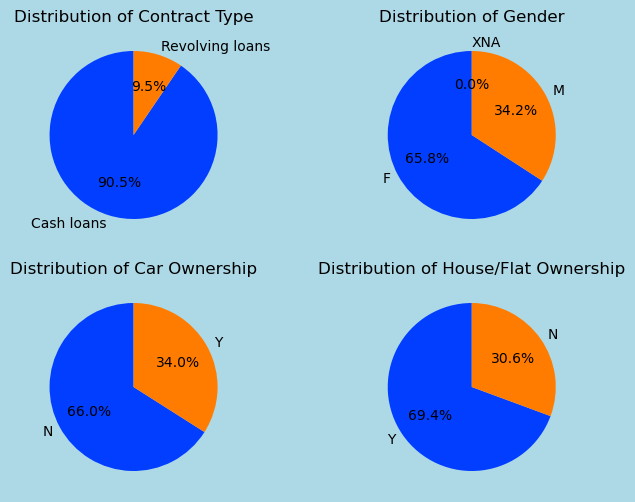

In [131]:
fig=plt.figure(figsize=(8,6))
fig.set_facecolor("lightblue")
for i in range(len(cat_dict_2.keys())):
    ax=plt.subplot(2,2,i+1)
    appl_data[list(cat_dict_2.values())[i]].value_counts().plot.pie(
    colors=palette_color,labels=appl_data[list(cat_dict_2.values())[i]].value_counts().index,
    autopct='%1.1f%%',startangle=90)
    plt.title('Distribution of '+list(cat_dict_2.keys())[i])
    plt.ylabel("")
  
plt.show() 

<b>Inference</b>

- 90.5% of the applicants have applied for cash loans while the remaining opted for Revolving loans
- Of the entire population of applicants 34.2% are males and 65.8% are females
- 34% of the applicants own car
- 69.4% of the applicants own either a house or flat

### Distribution of Ownership of Car & House/Flat by Gender

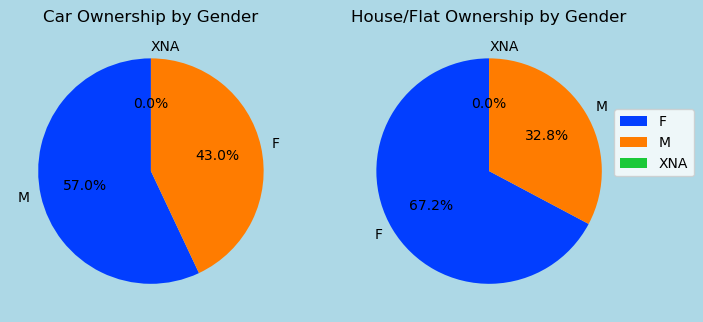

In [132]:
fig=plt.figure(figsize=(8,16))
fig.set_facecolor("lightblue")
ax=plt.subplot(1,2,1)
appl_data[appl_data['FLAG_OWN_CAR']=='Y']['CODE_GENDER'].value_counts().plot.pie(
    colors=palette_color,labels=appl_data[appl_data['FLAG_OWN_CAR']=='Y']['CODE_GENDER'].value_counts().index,
    autopct='%1.1f%%',startangle=90)
plt.title('Car Ownership by Gender')
plt.ylabel("")

ax=plt.subplot(1,2,2)
appl_data[appl_data['FLAG_OWN_REALTY']=='Y']['CODE_GENDER'].value_counts().plot.pie(
    colors=palette_color,labels=appl_data[appl_data['FLAG_OWN_REALTY']=='Y']['CODE_GENDER'].value_counts().index,
    autopct='%1.1f%%',startangle=90)
plt.title('House/Flat Ownership by Gender')
plt.ylabel("")
plt.legend(bbox_to_anchor = (1.25, 0.6), loc='center right')
plt.show()

<b>Inference</b>

- 43% of carowners are female and 57% are male.
- 32.8% of the house/flat owners are male and 67.2% are female.

### Distribution of Categorical Variables with more than two categories

<b>Suite Type, Income Type & Education Type</b>

In [133]:
cols_dict={ 'Suite Type':'NAME_TYPE_SUITE',
               'Income': 'NAME_INCOME_TYPE',
               'Education':'NAME_EDUCATION_TYPE'}

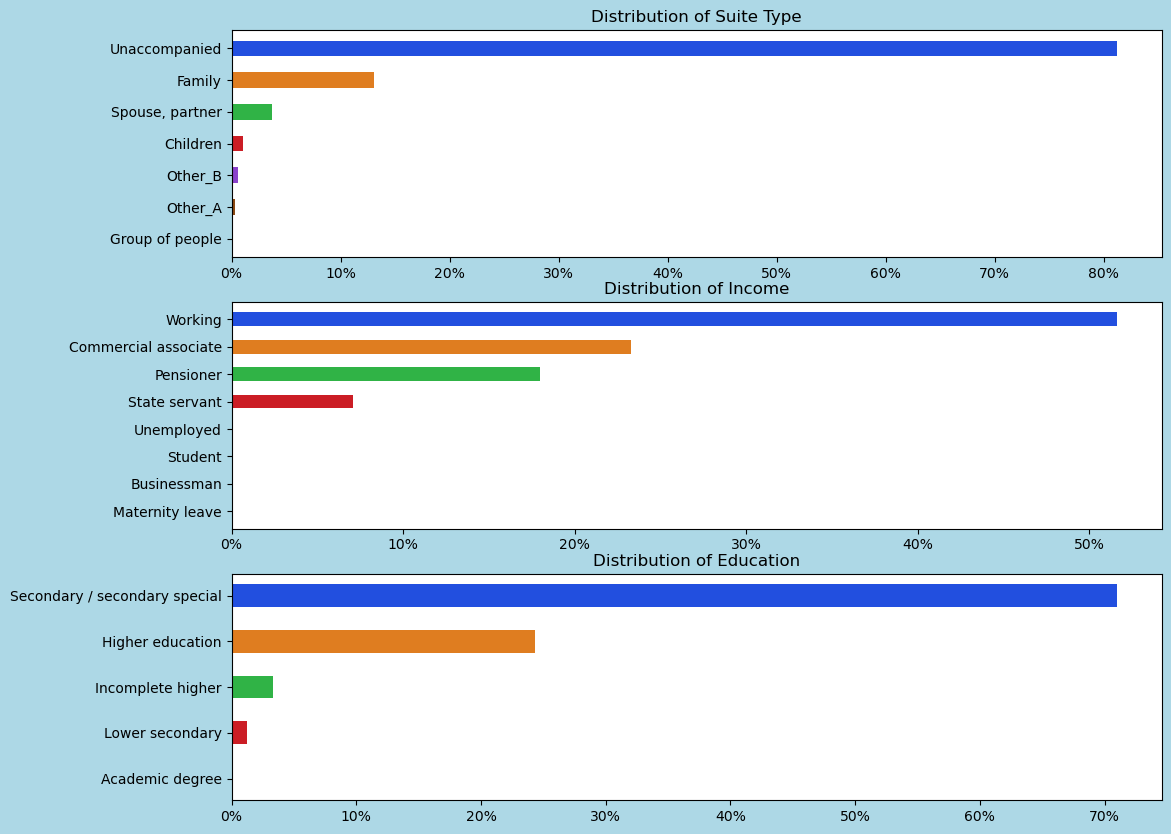

In [134]:
fig=plt.figure(figsize=(12,10))
fig.set_facecolor("lightblue")
for i in range(len(cols_dict.keys())):
    ax=plt.subplot(3,1,i+1)
    ax=sns.barplot(appl_data[list(cols_dict.values())[i]].value_counts()/appl_data.shape[0],orient='h',palette=palette_color,width=0.5)
    plt.title('Distribution of '+list(cols_dict.keys())[i])
    plt.ylabel("")
    plt.xlabel("")
    plt.autoscale()
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
    
plt.show() 

<b>Inference</b>

- More than 80% of the applicants were alone while applying the loan and ~15% came with family
- More than 50% of the applicants are wokring, ~25% are having commercial associations, ~19% are pensioners and~8% are working as state servants
- More than 70% have completed secondary education and ~25% have completed higher education

<b>Family Status, Type of Housing, Occupation</b>

In [135]:
cols_dict={'Family Status':'NAME_FAMILY_STATUS',
               'Type of Housing':'NAME_HOUSING_TYPE',
               'Occupation':'OCCUPATION_TYPE'}

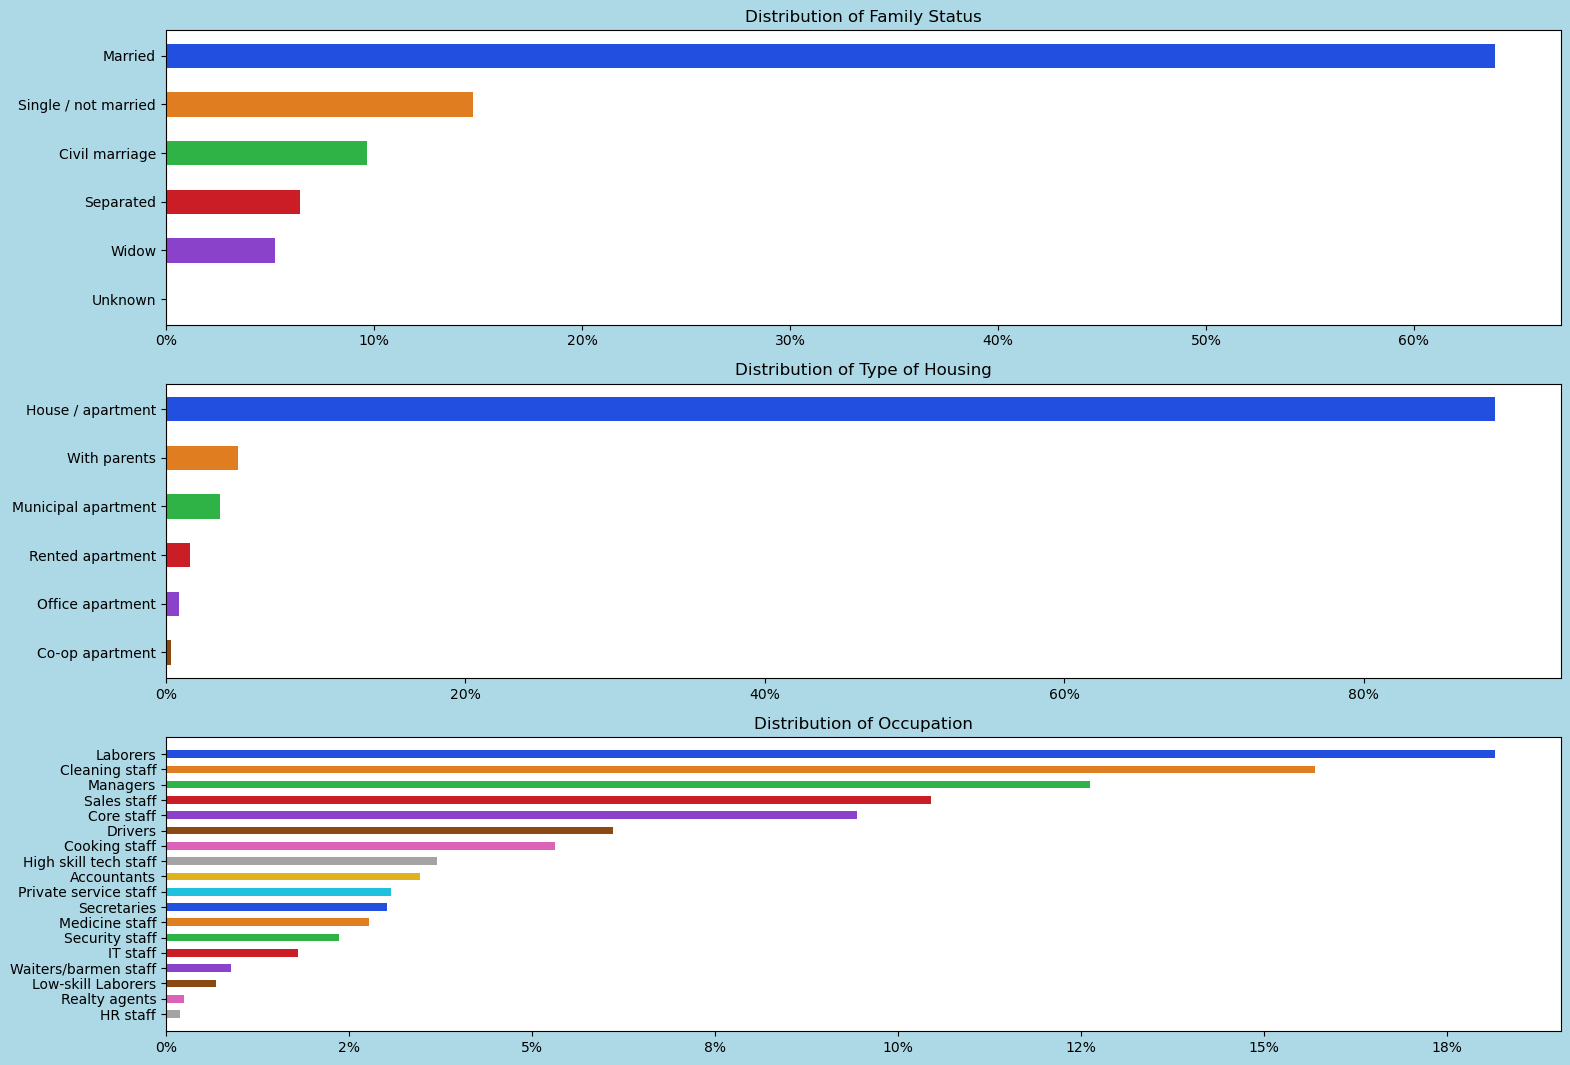

In [136]:
fig=plt.figure(figsize=(18,13))
fig.set_facecolor("lightblue")
for i in range(len(cols_dict.keys())):
    ax=plt.subplot(3,1,i+1)
    ax=sns.barplot(appl_data[list(cols_dict.values())[i]].value_counts()/appl_data.shape[0],orient='h',palette=palette_color,width=0.5)
    plt.title('Distribution of '+list(cols_dict.keys())[i])
    plt.ylabel("")
    plt.xlabel("")
    plt.autoscale()
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
    
plt.show() 

<b>Inference</b>

- More than 60% of the applicants are married
- ~90% of the applicants own either house or appartment
- Laborers, Cleaning Staff, Managers and sales staff are the top four categories of occupation of the applicants

### Distribution of Numerical Variables - Income, Annuity, Credit & Goods Price


In [137]:
num_dict_1={'Income':'AMT_INCOME_TOTAL', 
            'Credit':'AMT_CREDIT', 
            'Annuity':'AMT_ANNUITY', 
            'Goods Price':'AMT_GOODS_PRICE'}

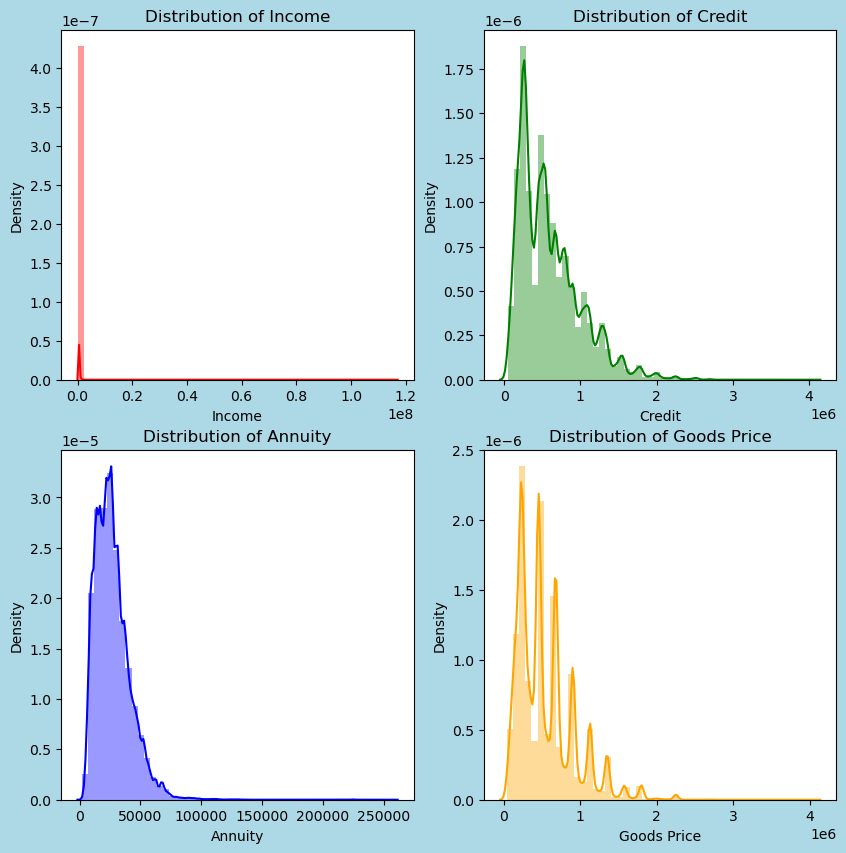

In [138]:
fig=plt.figure(figsize=(10,10))
fig.set_facecolor("lightblue")
colors=['red','green','blue','orange']
for i in range(len(num_dict_1.keys())):
    ax=plt.subplot(2,2,i+1)
    sns.distplot(appl_data[list(num_dict_1.values())[i]],color=colors[i])
    plt.title('Distribution of '+list(num_dict_1.keys())[i])
    plt.xlabel(list(num_dict_1.keys())[i])
    
plt.show() 

### Distribution of  Income, Annuity, Credit & Goods Price by Gender

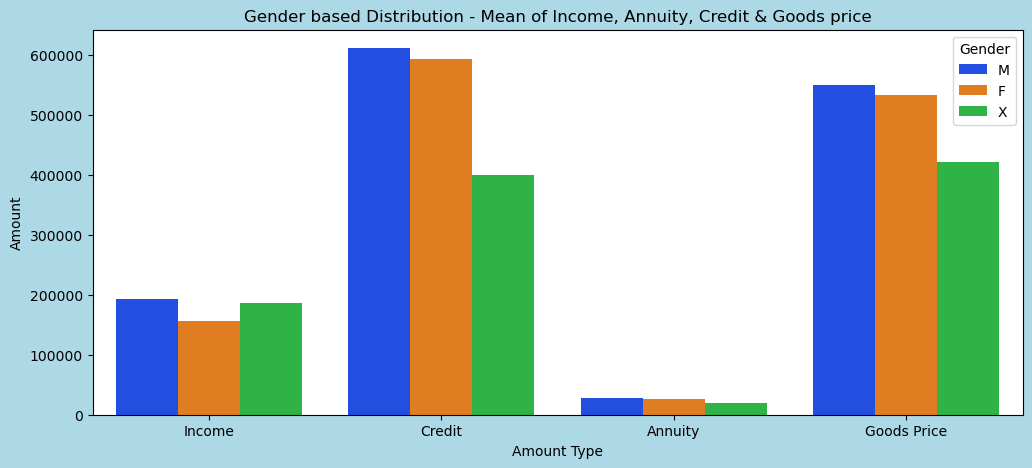

In [139]:
num_cols_1=list(num_dict_1.values())
df=appl_data.groupby('CODE_GENDER')[num_cols_1].mean().transpose().reset_index()

df_F   = df[["index","F"]]
df_F   = df_F.rename(columns={'index':"Amount Type", 'F':"Amount"})
df_F["Gender"] = "F"

df_M   = df[["index","M"]]
df_M   = df_M.rename(columns={'index':"Amount Type", 'M':"Amount"})
df_M["Gender"] = "M"

df_X   = df[["index","XNA"]]
df_X   = df_X.rename(columns={'index':"Amount Type", 'XNA':"Amount"})
df_X["Gender"] = "X"

df=pd.concat([df_M,df_F,df_X],axis=0)

fig=plt.figure(figsize=(12,5))
fig.set_facecolor("lightblue")
ax = sns.barplot(x="Amount Type",y="Amount",data=df,hue="Gender",palette=palette_color)
plt.title("Gender based Distribution - Mean of Income, Annuity, Credit & Goods price")
ax.set_xticklabels(['Income','Credit','Annuity','Goods Price'])
plt.show()


<b>Inference</b>

Males have higher income, credit, annuity and goods price compared to other genders

### Distribution of Numerical Variables - Age, Days Employed and Days before Registration Change

In [140]:
num_dict_2={'Age':'DAYS_BIRTH', 
            'Employed Days':'DAYS_EMPLOYED', 
            'Days before Registration Change':'DAYS_REGISTRATION'}

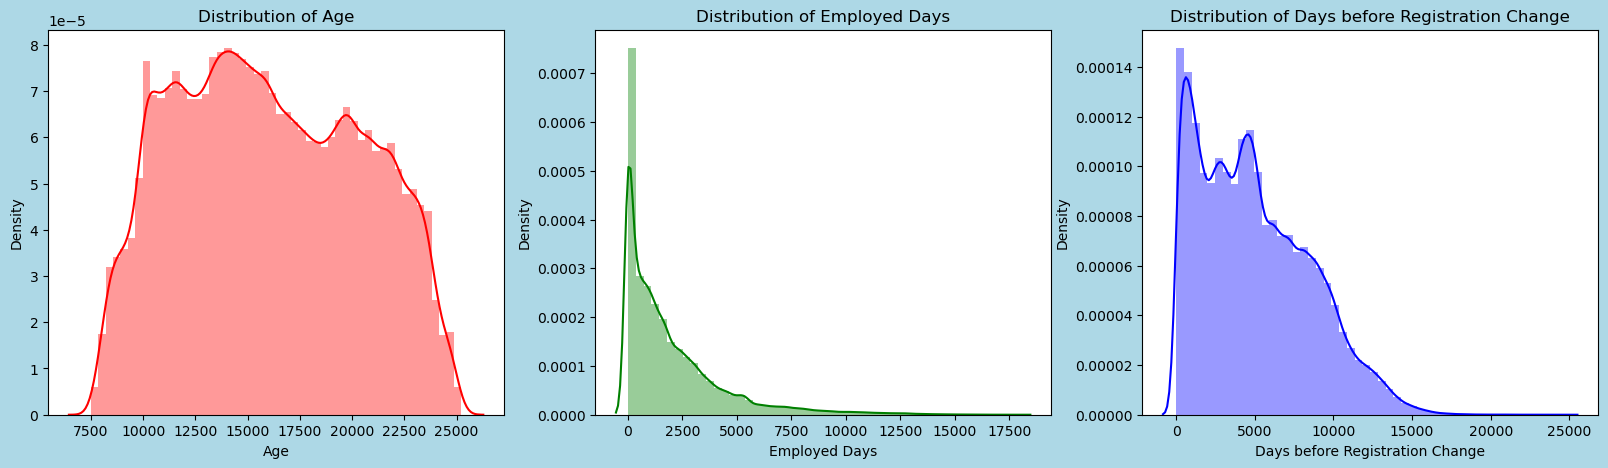

In [141]:
fig=plt.figure(figsize=(20,5))
fig.set_facecolor("lightblue")
colors=['red','green','blue','orange']
for i in range(len(num_dict_2.keys())):
    ax=plt.subplot(1,3,i+1)
    sns.distplot(appl_data[list(num_dict_2.values())[i]],color=colors[i])
    plt.title('Distribution of '+list(num_dict_2.keys())[i])
    plt.xlabel(list(num_dict_2.keys())[i])
    
plt.show() 

<b>Inference</b>

- The age of the applicants is mostly following the normal distribution
- The distribution of employed days and days before registration change are skewed to the left

### Distribution based on Repayment Status - Contract Type, Gender, Car Ownership & House/Flat Ownership

In [142]:
cat_dict_2={'Contract Type':'NAME_CONTRACT_TYPE',
            'Gender':'CODE_GENDER',
            'Car Ownership':'FLAG_OWN_CAR',
            'House/Flat Ownership':'FLAG_OWN_REALTY'}

In [143]:
defaulters=appl_data[appl_data['TARGET']=='default']
repayers=appl_data[appl_data['TARGET']=='repay']

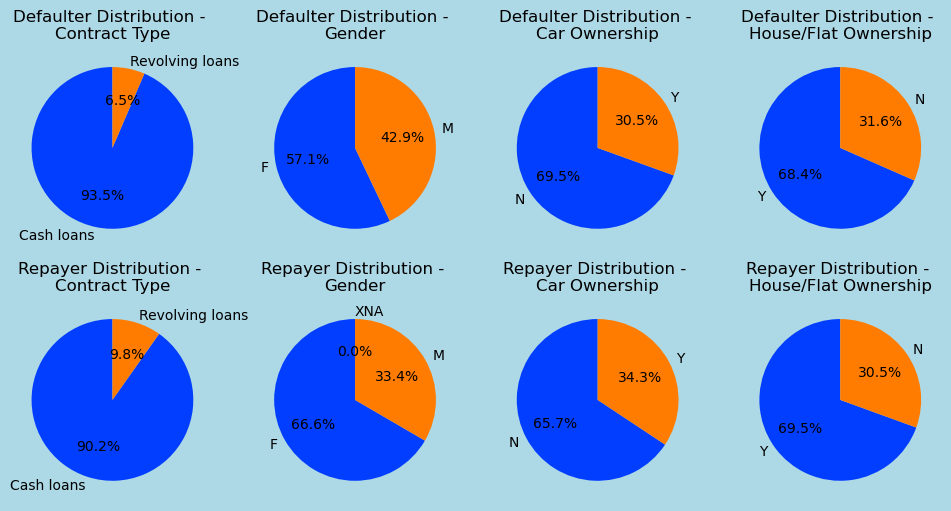

In [144]:
fig=plt.figure(figsize=(12,12))
fig.set_facecolor("lightblue")
for i in range(len(cat_dict_2.keys())):
    ax=plt.subplot(1,4,i+1)
    repayers[list(cat_dict_2.values())[i]].value_counts().plot.pie(
    colors=palette_color,labels=repayers[list(cat_dict_2.values())[i]].value_counts().index,
    autopct='%1.1f%%',startangle=90)
    plt.title('Repayer Distribution - \n'+list(cat_dict_2.keys())[i])
    plt.ylabel("")

    ax=plt.subplot(2,4,i+1)
    defaulters[list(cat_dict_2.values())[i]].value_counts().plot.pie(
    colors=palette_color,labels=defaulters[list(cat_dict_2.values())[i]].value_counts().index,
    autopct='%1.1f%%',startangle=90)
    plt.title('Defaulter Distribution - \n'+list(cat_dict_2.keys())[i])
    plt.ylabel("")
plt.show() 

<b>Inference</b>

- Percentage of revolving loans is 3.3% more in repayers than defaulters
- Percentage of males in repayers is 9.5% more in repayers than defaulters

### Distribution of Repayment Status based on Categorical Variables 

<b>Suite Type, Income Type & Education Type</b>

In [145]:
cols_dict={ 'Suite Type':'NAME_TYPE_SUITE',
               'Income': 'NAME_INCOME_TYPE',
               'Education':'NAME_EDUCATION_TYPE'}

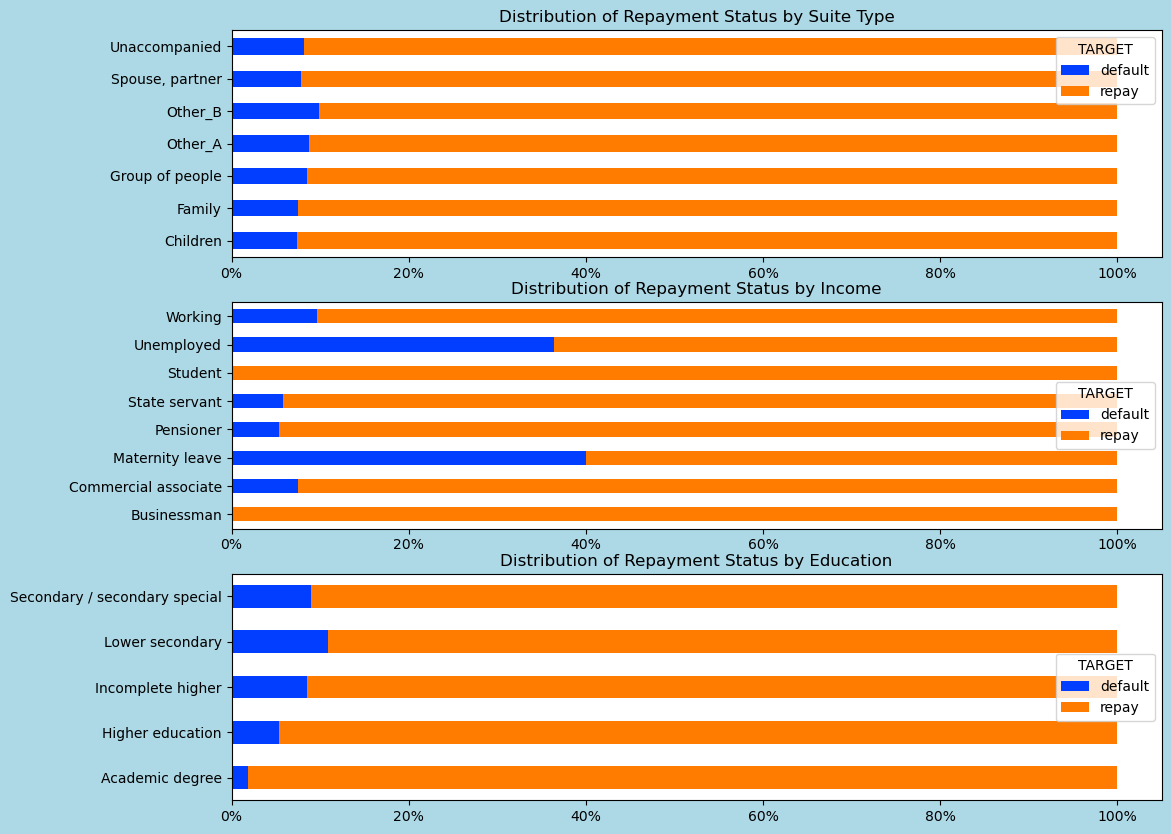

In [146]:
fig=plt.figure(figsize=(12,10))
fig.set_facecolor("lightblue")
for i in range(len(cols_dict.keys())):
    df_stack=stack_bar(appl_data,'TARGET',list(cols_dict.values())[i],'SK_ID_CURR')
    ax=plt.subplot(3,1,i+1)
    df_stack.plot(kind='barh', stacked=True, color=palette_color,ax=ax,width=0.5)
    plt.title('Distribution of Repayment Status by '+list(cols_dict.keys())[i])
    plt.xlabel("")
    plt.ylabel("")
    
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])

plt.show()

<b>Inference</b>

- Defaulter-Repayer split is mostly independent of type of company the applicant had while applying the loan
- Percentage of defaulters is close to 40% in case unemployed and on maternity leave.
- Percentage of defaulters is more with clients who studied till lower secondary and low with applicants having academic degree

<b>Family Status, Type of Housing, Occupation</b>

In [147]:
cols_dict={'Family Status':'NAME_FAMILY_STATUS',
               'Housing Type':'NAME_HOUSING_TYPE',
               'Occupation':'OCCUPATION_TYPE'}

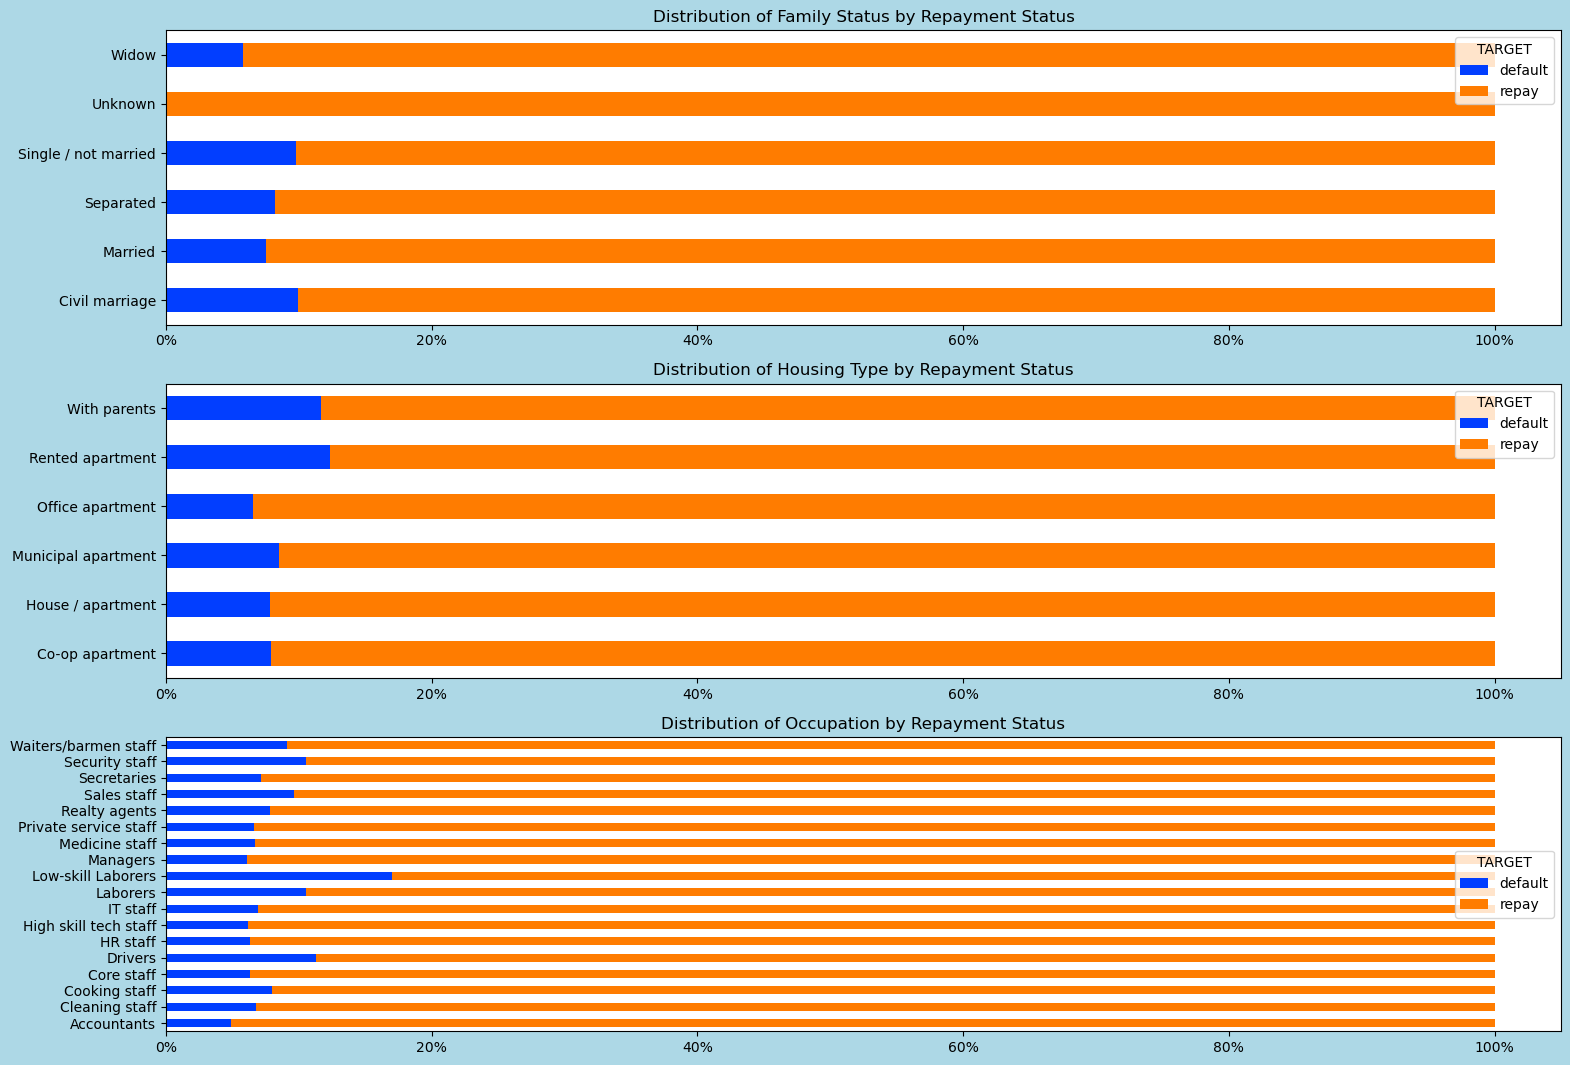

In [148]:
fig=plt.figure(figsize=(18,13))
fig.set_facecolor("lightblue")
for i in range(len(cols_dict.keys())):
    df_stack=stack_bar(appl_data,'TARGET',list(cols_dict.values())[i],'SK_ID_CURR')
    ax=plt.subplot(3,1,i+1)
    df_stack.plot(kind='barh', stacked=True, color=palette_color,ax=ax,width=0.5)
    plt.title('Distribution of '+list(cols_dict.keys())[i]+' by Repayment Status')
    plt.xlabel("")
    plt.ylabel("")
    
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])

plt.show()

<b>Inference</b>

- The clients who are living with parents or in a rented apartment are more likely to default compared to other housing types
- Low-skill laborers are more likely to default compared with other occupations

### Distribution of Contact Information Provided

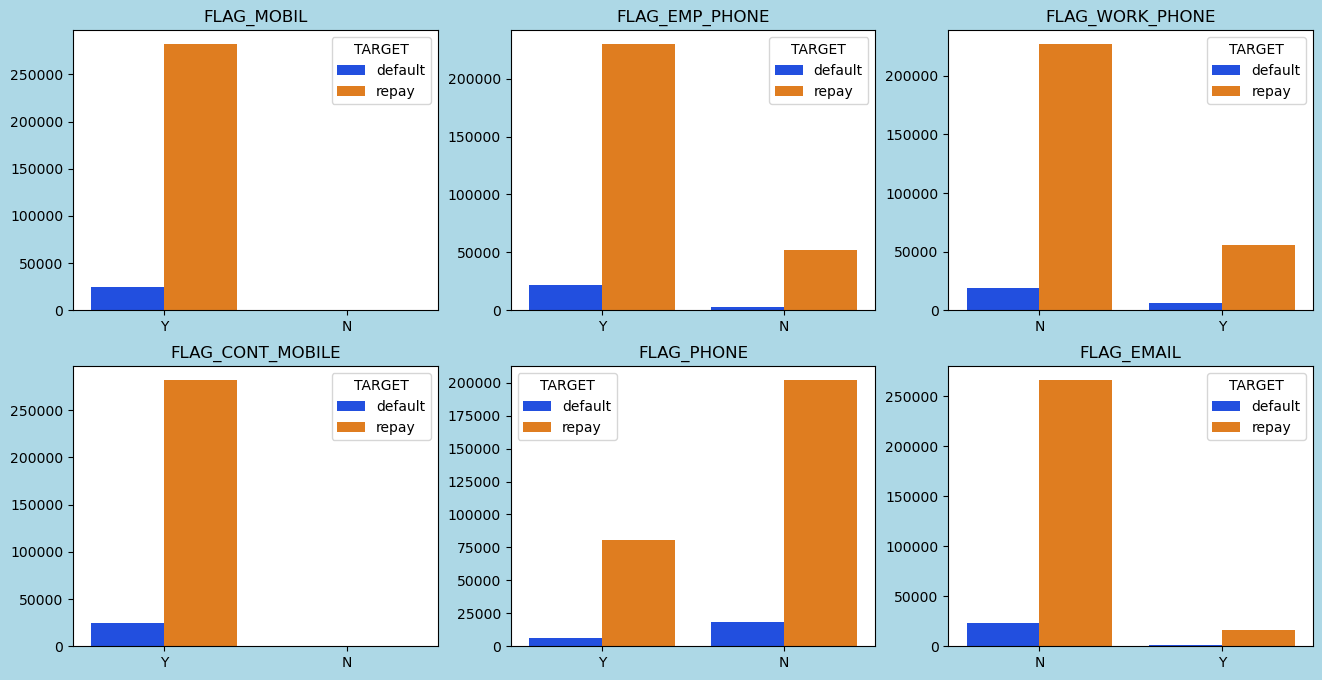

In [149]:
cols = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL']
df=appl_data[cols+["TARGET"]]
df=df.replace({1:"YES",0:"NO"})

fig=plt.figure(figsize=(16,8))
fig.set_facecolor("lightblue")
for i in range(len(cols)):
    ax=plt.subplot(2,3,i+1)
    sns.countplot(data=df,x=cols[i],hue='TARGET',palette=palette_color)
    plt.title(cols[i])
    plt.xlabel('')
    plt.ylabel('')
plt.show()


### Distribution of normalized population of region by Repayment Status

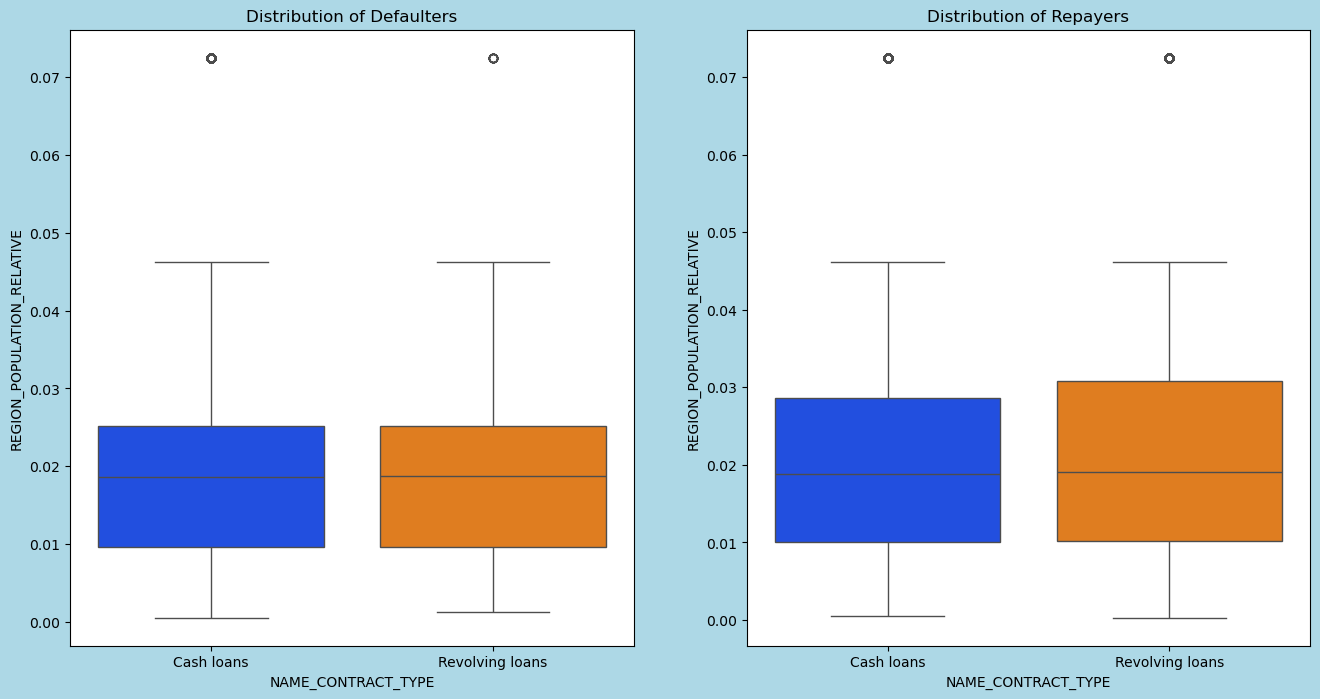

In [150]:
fig=plt.figure(figsize=(16,8))
fig.set_facecolor("lightblue")

ax=plt.subplot(1,2,1)
sns.boxplot(y=appl_data[appl_data['TARGET']=='default']['REGION_POPULATION_RELATIVE'],
            x=appl_data[appl_data['TARGET']=='default']['NAME_CONTRACT_TYPE'],
            palette=palette_color)
plt.title('Distribution of Defaulters')

ax=plt.subplot(1,2,2)
sns.boxplot(y=appl_data[appl_data['TARGET']=='repay']['REGION_POPULATION_RELATIVE'],
            x=appl_data[appl_data['TARGET']=='repay']['NAME_CONTRACT_TYPE'],
            palette=palette_color)
plt.title('Distribution of Repayers')

plt.show()

<b>Inference</b>

Clients living in high population regions are more likely to repay the loan

## EDA on Previous Application Data

### Current Applicant having previous applicaitons

In [151]:
df=prev_appl.groupby("SK_ID_CURR")["SK_ID_PREV"].count().reset_index()
df['SK_ID_PREV'].describe()

count    338857.000000
mean          4.928964
std           4.220716
min           1.000000
25%           2.000000
50%           4.000000
75%           7.000000
max          77.000000
Name: SK_ID_PREV, dtype: float64

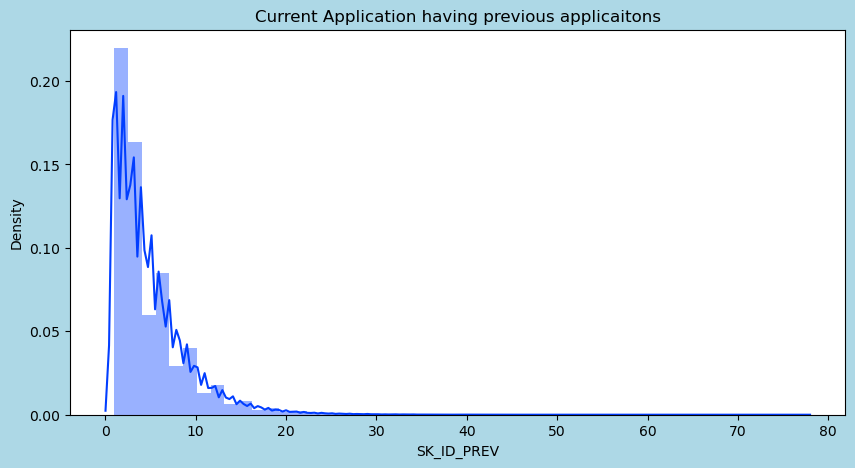

In [152]:
fig=plt.figure(figsize=(10,5))
fig.set_facecolor("lightblue")
ax = sns.distplot(df["SK_ID_PREV"],color=palette_color[0])
plt.title('Current Application having previous applicaitons')
plt.show()

<b>Inference</b>

On an average each client had applied for 4 loans previously

### Distribution of Contract Types

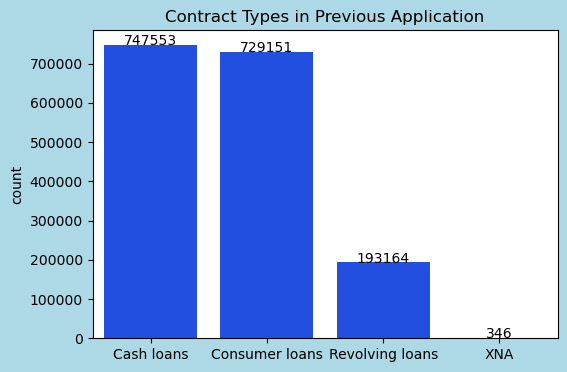

In [153]:
fig=plt.figure(figsize=(6,4))
fig.set_facecolor("lightblue")
ax=sns.barplot(prev_appl["NAME_CONTRACT_TYPE"].value_counts(),color=palette_color[0])
plt.title('Contract Types in Previous Application')
add_label_bar(prev_appl['NAME_CONTRACT_TYPE'].value_counts().index,prev_appl['NAME_CONTRACT_TYPE'].value_counts())
plt.xlabel("")
plt.show()

<b>Inference</b>

More numbers of applications are for cash loans followed by consumers loans and revolving loans

### Ammount Applied vs. Credited

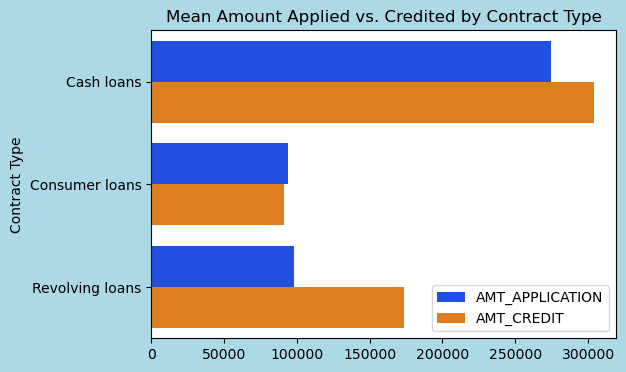

In [154]:
df = prev_appl.groupby("NAME_CONTRACT_TYPE")[["AMT_APPLICATION","AMT_CREDIT"]].mean().stack().reset_index()
fig=plt.figure(figsize=(6,4))
fig.set_facecolor("lightblue")
ax=sns.barplot(data=df[0:6],x=0,y='NAME_CONTRACT_TYPE',hue='level_1',palette=palette_color)
plt.legend(loc='lower right')
plt.ylabel('Contract Type')
plt.xlabel("")
plt.title('Mean Amount Applied vs. Credited by Contract Type')
plt.show()

<b>Inference</b>

- Revolving loans have the amount credited almost double the amount applied for.
- For consumer loand the amount credited is almost inline with the amount applied for.

### Distribution of Application Status by Contract Type

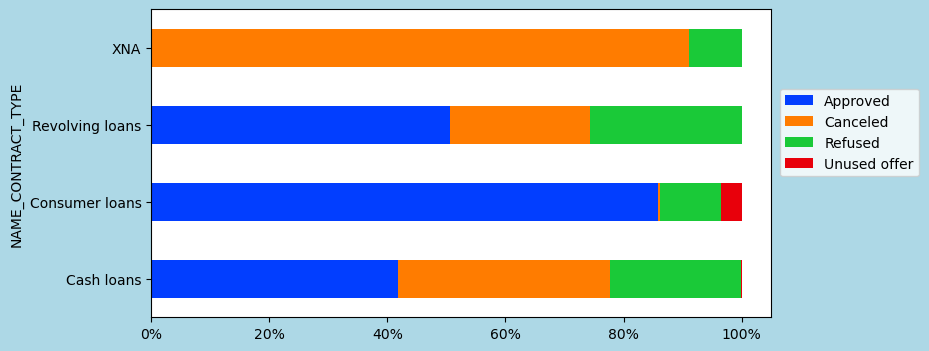

In [155]:
df_stack=stack_bar(prev_appl,'NAME_CONTRACT_STATUS','NAME_CONTRACT_TYPE','SK_ID_PREV')
fig=plt.figure(figsize=(8,4))
fig.set_facecolor("lightblue")
ax=plt.subplot(1,1,1)
df_stack.plot(kind='barh', stacked=True, color=palette_color,ax=ax)
plt.legend(bbox_to_anchor = (1.25, 0.6), loc='center right')
vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
plt.show()

<b>Inference</b>

- More number of consumer loans are approved than otherwise
- The distribution of application status is almost similar for cash loans and revolving loans

### Distribution of Payment Type, Type of Client, Portfolio & Product Type

In [156]:
cols_dict={'Payment Type':'NAME_PAYMENT_TYPE',
           'Type of Client':'NAME_CLIENT_TYPE',
           'Portfolio':'NAME_PORTFOLIO',
           'Product Type':'NAME_PRODUCT_TYPE',
           }

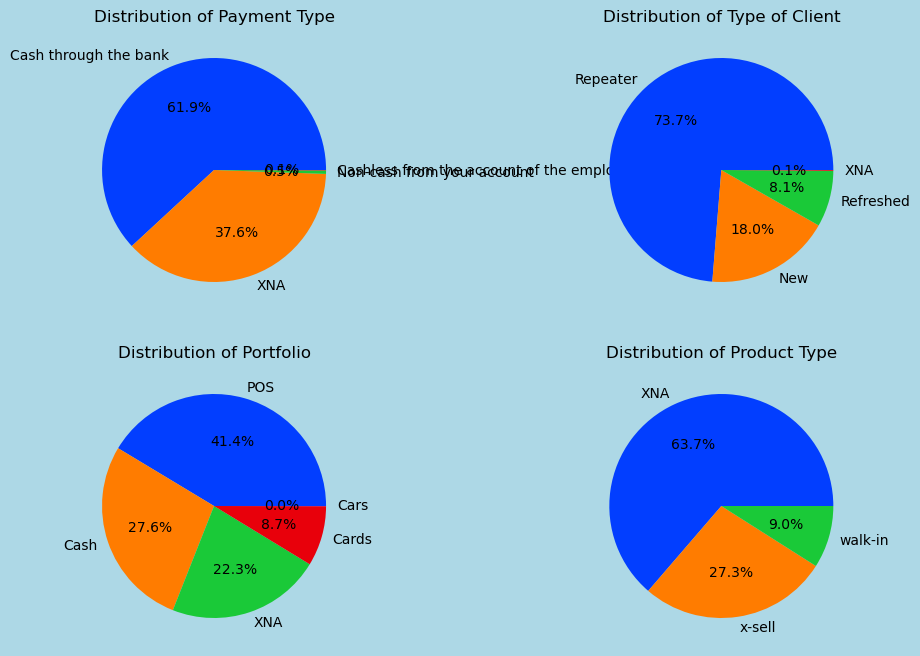

In [157]:
fig=plt.figure(figsize=(12,8))
fig.set_facecolor("lightblue")
for i in range(len(cols_dict.keys())):
    ax=plt.subplot(2,2,i+1)
    prev_appl[list(cols_dict.values())[i]].value_counts().plot.pie(
    colors=palette_color,labels=prev_appl[list(cols_dict.values())[i]].value_counts().index,
    autopct='%1.1f%%',startangle=0)
    plt.title('Distribution of '+list(cols_dict.keys())[i])
    plt.ylabel("")
 
plt.show() 

<b>Inference</b>

- 61.9% of the clients opted for repaying the loan via cash through the bank
- 73.7% of the clients are repeat client while 18% are fresh applicants

### Distribution ofApplication Status by Payment Type & Type of Client

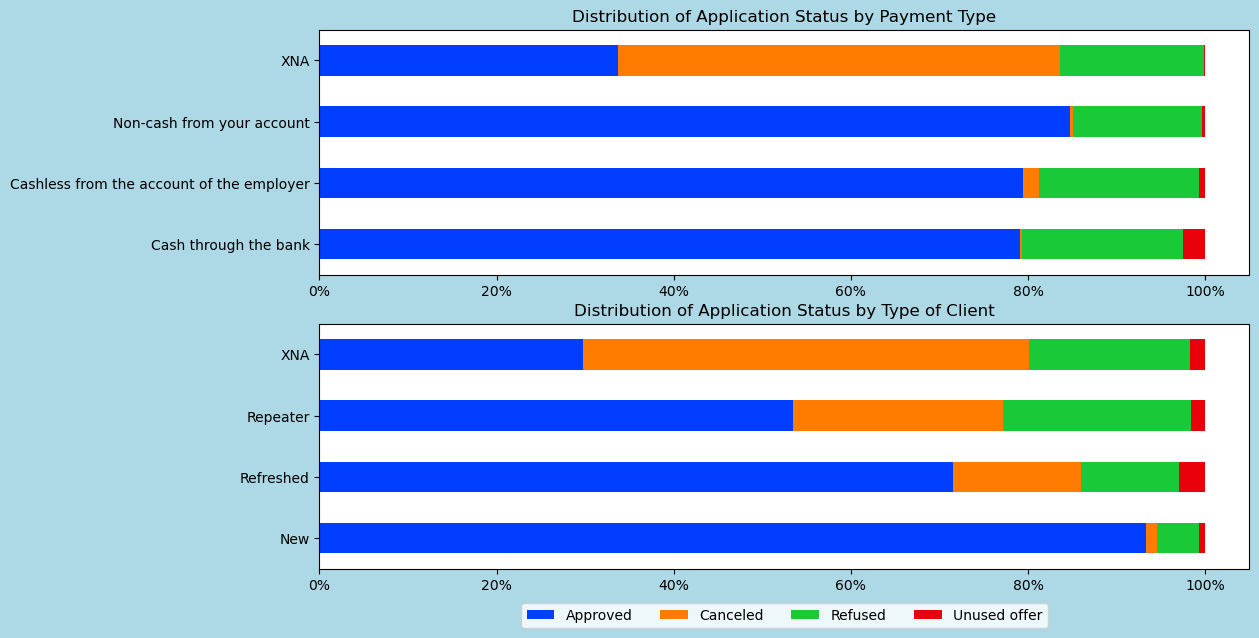

In [158]:
fig=plt.figure(figsize=(12,7))
fig.set_facecolor("lightblue")
for i in range(2):
    df_stack=stack_bar(prev_appl,'NAME_CONTRACT_STATUS',list(cols_dict.values())[i],'SK_ID_PREV')
    ax=plt.subplot(2,1,i+1)
    df_stack.plot(kind='barh', stacked=True, color=palette_color,ax=ax,width=0.5)
    plt.title('Distribution of Application Status by '+list(cols_dict.keys())[i])
    plt.xlabel("")
    plt.ylabel("")
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
    ax.get_legend().remove()

plt.legend(bbox_to_anchor =(0.5,-0.27), loc='lower center',ncols=4)
plt.show()

<b>Inference</b>

- The approval rate for the client who opted for the payments via non-cah, cashless and cash through bank is almost same
- New applicants have high approval rate while XNA has low.
- The approval rate for repeaters is at ~50%

### Distribution ofApplication Status by Portfolio & Product Type

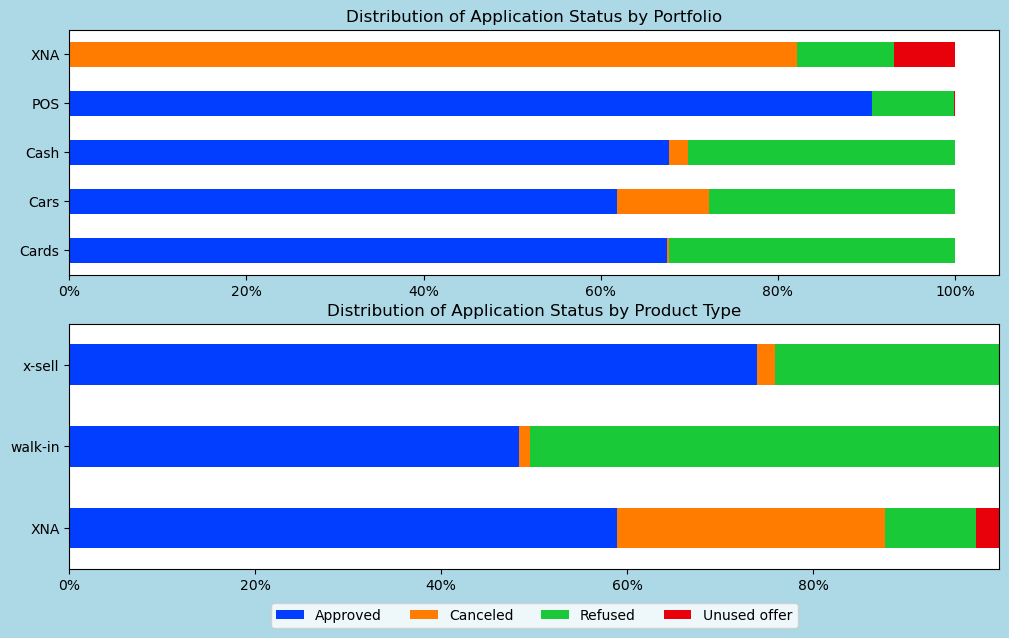

In [159]:
fig=plt.figure(figsize=(12,7))
fig.set_facecolor("lightblue")
for i in range(2):
    df_stack=stack_bar(prev_appl,'NAME_CONTRACT_STATUS',list(cols_dict.values())[i+2],'SK_ID_PREV')
    ax=plt.subplot(2,1,i+1)
    df_stack.plot(kind='barh', stacked=True, color=palette_color,ax=ax,width=0.5)
    plt.title('Distribution of Application Status by '+list(cols_dict.keys())[i+2])
    plt.xlabel("")
    plt.ylabel("")
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
    ax.get_legend().remove()

plt.legend(bbox_to_anchor =(0.5,-0.27), loc='lower center',ncols=4)
plt.show()

<b>Inference</b>

- The approval rate for clients having portfolio as POS is more compared with other portfolios
- The approval rate for clients with x-sell product type is very high compared with other catrgories
- Walk-in applicants are approved and rejected almost equally

### Distribution of Reason for Rejection & Channel Type

In [160]:
cols_dict_2={'Reason for Rejection':'CODE_REJECT_REASON',
           'Channel Type':'CHANNEL_TYPE'}

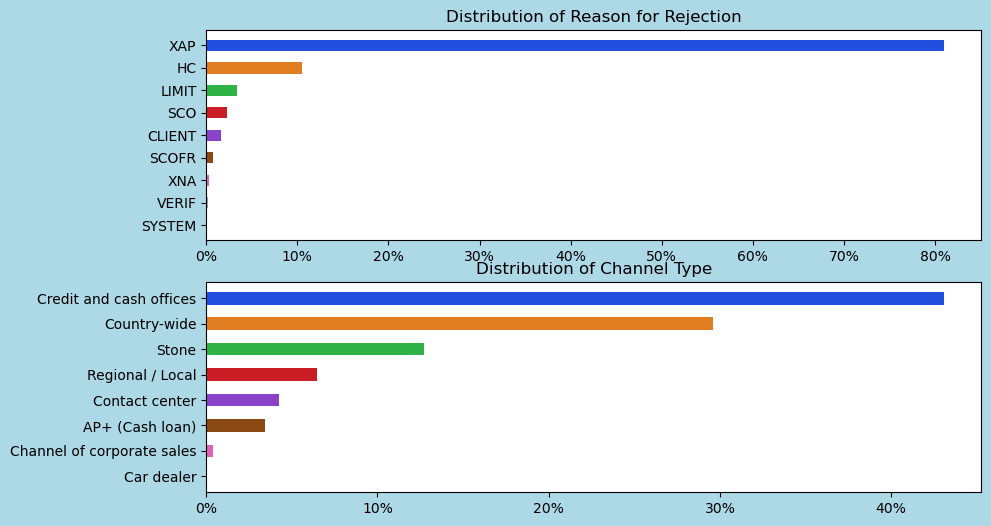

In [161]:
fig=plt.figure(figsize=(10,6))
fig.set_facecolor("lightblue")
for i in range(len(cols_dict_2.keys())):
    ax=plt.subplot(2,1,i+1)
    ax=sns.barplot(prev_appl[list(cols_dict_2.values())[i]].value_counts()/prev_appl.shape[0],orient='h',palette=palette_color,width=0.5)
    plt.title('Distribution of '+list(cols_dict_2.keys())[i])
    plt.ylabel("")
    plt.xlabel("")
    plt.autoscale()
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
    
plt.show() 

<b>Inference</b>

- The most common reason for rejection is XAP which is more than 80% followed by HC(>10%).
- The percentage of clients acquired through credit and cash offices is more at >40% followed by Country-wide at around 30%

### Distribution of Goods for which Loan is applied

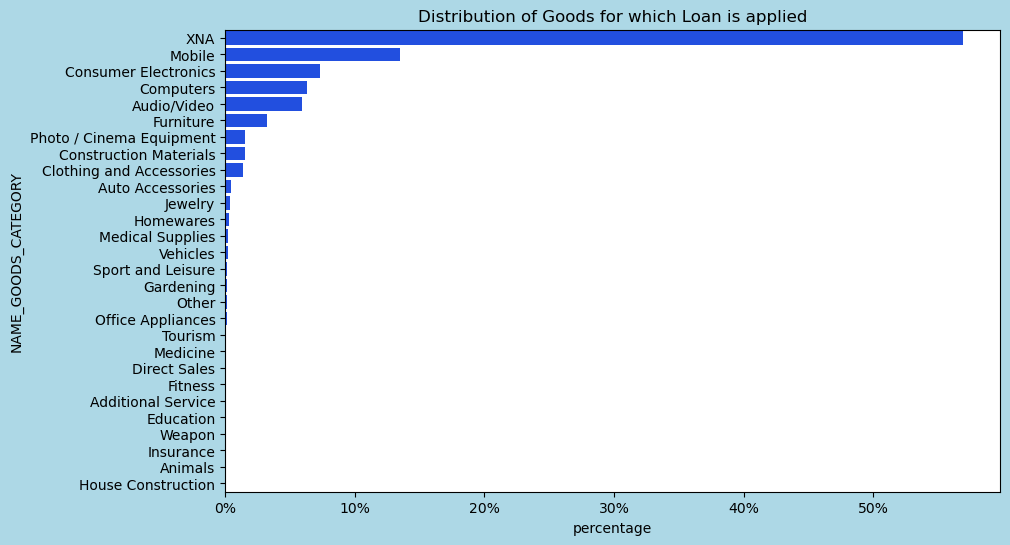

In [162]:
goods_df=prev_appl['NAME_GOODS_CATEGORY'].value_counts().reset_index()
goods_df['percentage']=goods_df['count']/goods_df['count'].sum()
fig=plt.figure(figsize=(10,6))
fig.set_facecolor("lightblue")
ax=sns.barplot(x=goods_df["percentage"],y=goods_df['NAME_GOODS_CATEGORY'],color=palette_color[0],orient='h')
plt.title('Distribution of Goods for which Loan is applied')
vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
plt.show()

<b>Inferences</b>

The most common goods for which the loan applied is XNA, Mobile, Consumer Electronics, Computers and Audio/Video

### Analysis on Cash Loan Purposes

<b>Distribution of Cash Loan Purposes</b>

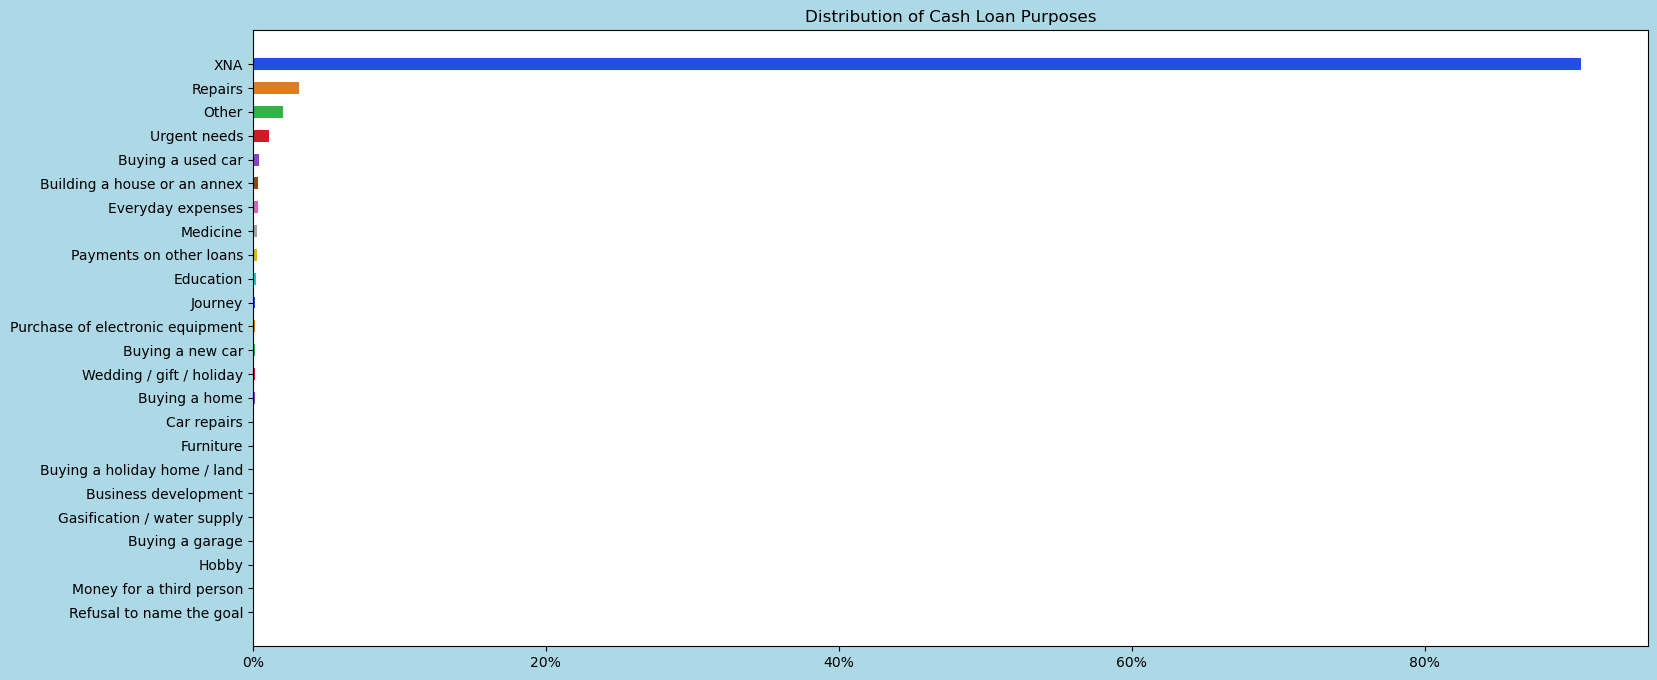

In [163]:
fig=plt.figure(figsize=(18,8))
fig.set_facecolor("lightblue")
df=prev_appl[prev_appl['NAME_CONTRACT_TYPE']=='Cash loans']['NAME_CASH_LOAN_PURPOSE']
ax=sns.barplot(df.value_counts()/df.shape[0],orient='h',palette=palette_color,width=0.5)
plt.title('Distribution of Cash Loan Purposes')
plt.ylabel("")
plt.xlabel("")
plt.autoscale()
vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
    
plt.show() 

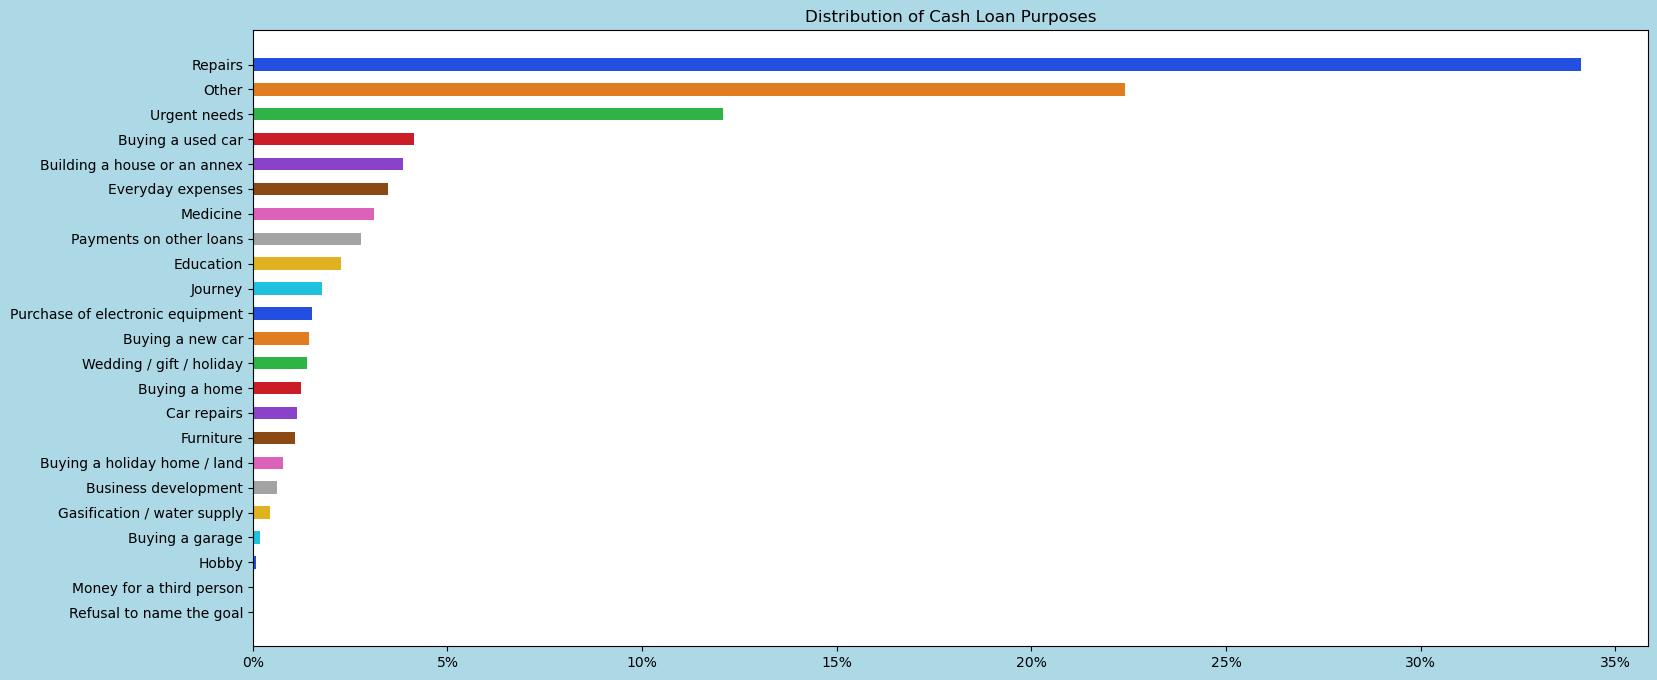

In [164]:
fig=plt.figure(figsize=(18,8))
fig.set_facecolor("lightblue")
df=prev_appl[(prev_appl['NAME_CONTRACT_TYPE']=='Cash loans') & (prev_appl['NAME_CASH_LOAN_PURPOSE']!='XNA')]['NAME_CASH_LOAN_PURPOSE']
ax=sns.barplot(df.value_counts()/df.shape[0],orient='h',palette=palette_color,width=0.5)
plt.title('Distribution of Cash Loan Purposes')
plt.ylabel("")
plt.xlabel("")
plt.autoscale()
vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
    
plt.show() 

<b>Inference</b>

The most common reason (excluding XNA) for which a cash loan is applied, is Repairs, Others, Urgent needs, buyig a used car and building house or an annex

<b>Distribution of Application Status by Cash Loan Purpose</b>

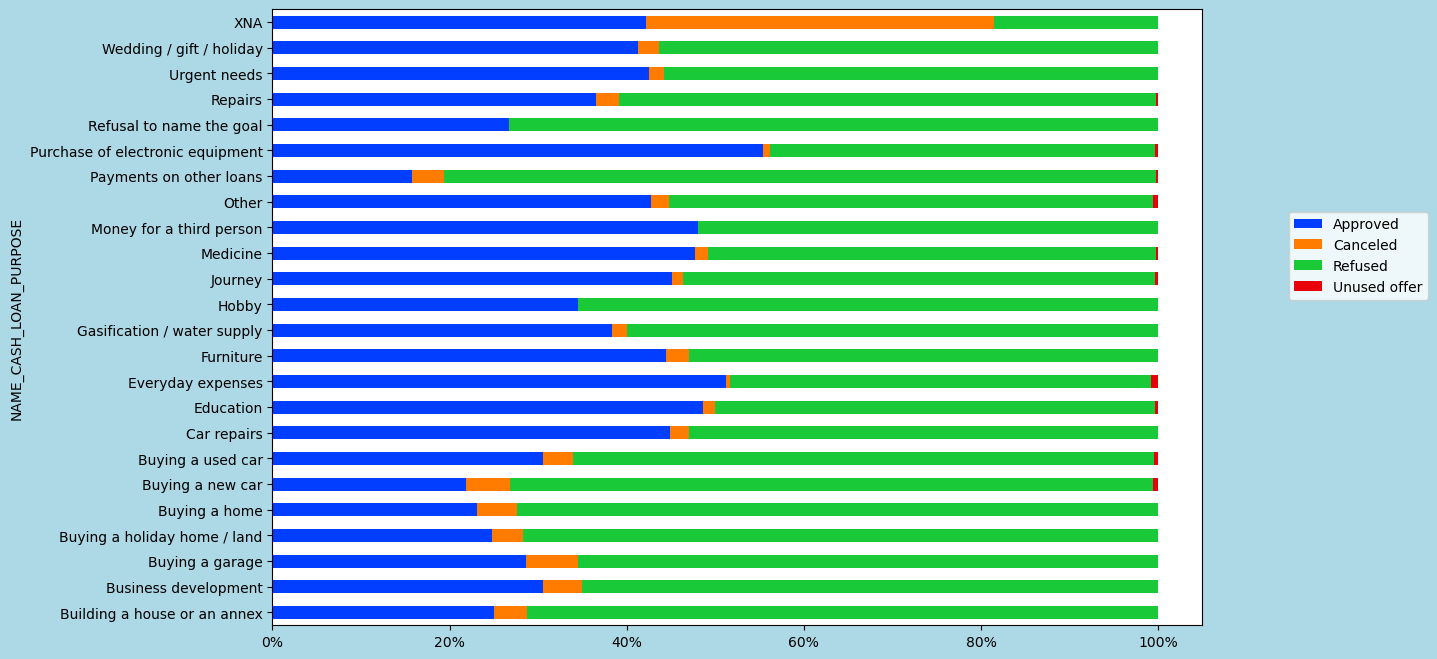

In [165]:
df=prev_appl[prev_appl['NAME_CONTRACT_TYPE']=='Cash loans']
df_stack=stack_bar(df,'NAME_CONTRACT_STATUS','NAME_CASH_LOAN_PURPOSE','SK_ID_PREV')
fig=plt.figure(figsize=(12,8))
fig.set_facecolor("lightblue")
ax=plt.subplot(1,1,1)
df_stack.plot(kind='barh', stacked=True, color=palette_color,ax=ax)
plt.legend(bbox_to_anchor = (1.25, 0.6), loc='center right')
vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
plt.show()

<b>Inference</b>

- The approval rate is the highest on the cash loans applied for purchase of electronic equuipment followed by everyday expenses, education and medicine.
- The refusal rate is the lowest on the cash loans applied for payments on other loans, and for refusal to name the goal.

### Correlation between variables

#### Application Data

<b>Correlation Heatmap</b>

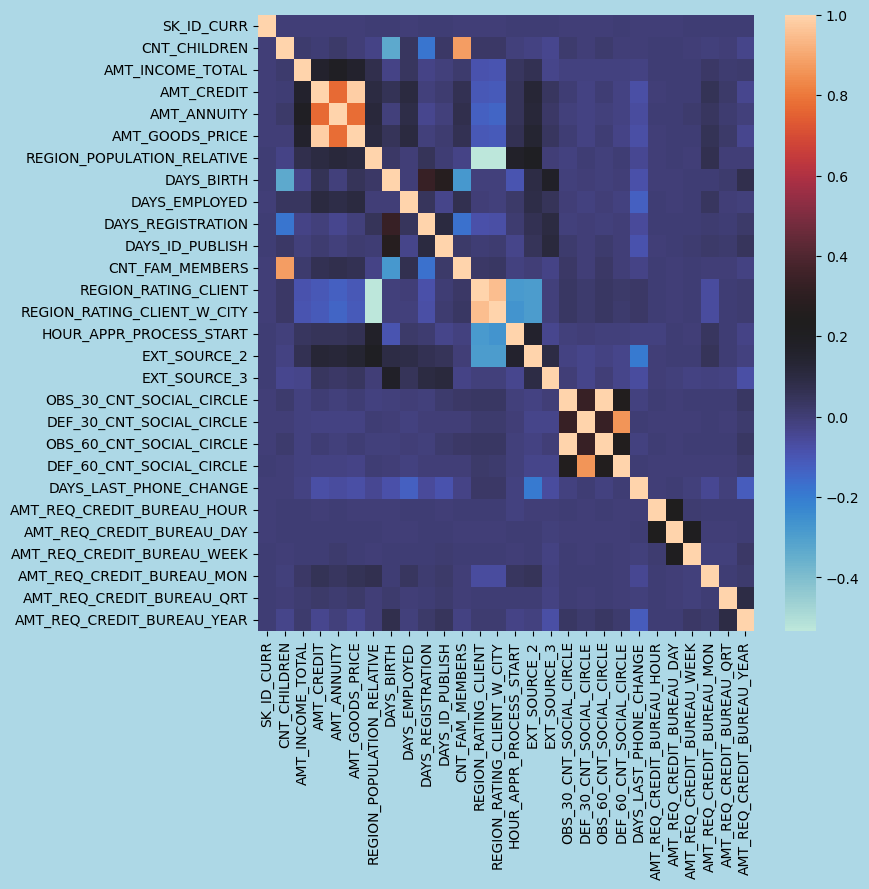

In [166]:
corr_mat_appl=appl_data.corr(numeric_only=True)
fig=plt.figure(figsize=(8,8))
fig.set_facecolor("lightblue")
ax=plt.subplot(1,1,1)
sns.heatmap(corr_mat_appl, ax = ax,cmap='icefire')
#sns.color_palette('rainbow', as_cmap = True)
plt.show()

<b>Top 10 Correlation Fields</b>

In [167]:
corr_df_appl=corr_mat_appl.where(np.triu(np.ones(corr_mat_appl.shape),k=1).astype(bool))
corr_df_appl=corr_df_appl.unstack().reset_index()
corr_df_appl.columns=['Var1','Var2','Correlation']
corr_df_appl.dropna(subset=['Correlation'],inplace=True)
corr_df_appl['Corr Type']=np.where(corr_df_appl['Correlation']>0,'Positive','Negative')
corr_df_appl['Correlation']=abs(corr_df_appl['Correlation'])
corr_df_appl.sort_values(by='Correlation',ascending=False).head(10)

,Var1,Var2,Correlation,Corr Type
549,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998491,Positive
143,AMT_GOODS_PRICE,AMT_CREDIT,0.986734,Positive
376,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950842,Positive
309,CNT_FAM_MEMBERS,CNT_CHILDREN,0.879160,Positive
578,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.860556,Positive
144,AMT_GOODS_PRICE,AMT_ANNUITY,0.774837,Positive
115,AMT_ANNUITY,AMT_CREDIT,0.770127,Positive
342,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.532877,Negative
370,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,0.531535,Negative
550,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.331951,Positive


#### Previous Application

<b>Correlation Heatmap</b>

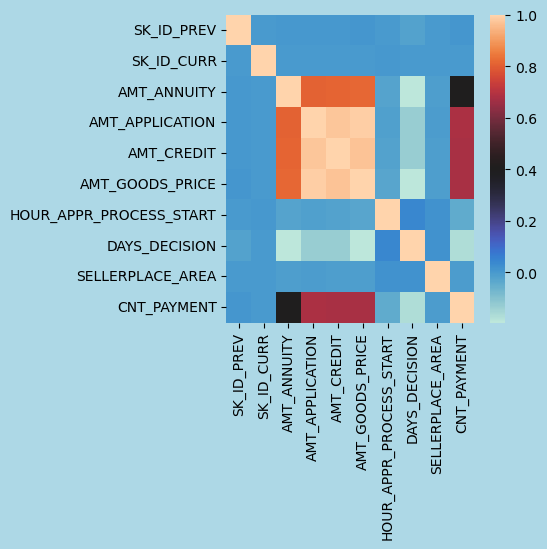

In [168]:
corr_mat_prev=prev_appl.corr(numeric_only=True)
fig=plt.figure(figsize=(4,4))
fig.set_facecolor("lightblue")
ax=plt.subplot(1,1,1)
sns.heatmap(corr_mat_prev, ax = ax,cmap='icefire')
#sns.color_palette('rainbow', as_cmap = True)
plt.show()

<b> Top 10 Correlation Fields</b>

In [169]:
corr_df_prev=corr_mat_prev.where(np.triu(np.ones(corr_mat_prev.shape),k=1).astype(bool))
corr_df_prev=corr_df_prev.unstack().reset_index()
corr_df_prev.columns=['Var1','Var2','Correlation']
corr_df_prev.dropna(subset=['Correlation'],inplace=True)
corr_df_prev['Corr Type']=np.where(corr_df_prev['Correlation']>0,'Positive','Negative')
corr_df_prev['Correlation']=abs(corr_df_prev['Correlation'])
corr_df_prev.sort_values(by='Correlation',ascending=False).head(10)


,Var1,Var2,Correlation,Corr Type
53,AMT_GOODS_PRICE,AMT_APPLICATION,0.987143,Positive
43,AMT_CREDIT,AMT_APPLICATION,0.975824,Positive
54,AMT_GOODS_PRICE,AMT_CREDIT,0.971117,Positive
52,AMT_GOODS_PRICE,AMT_ANNUITY,0.816293,Positive
42,AMT_CREDIT,AMT_ANNUITY,0.811670,Positive
32,AMT_APPLICATION,AMT_ANNUITY,0.805558,Positive
93,CNT_PAYMENT,AMT_APPLICATION,0.681114,Positive
95,CNT_PAYMENT,AMT_GOODS_PRICE,0.676007,Positive
94,CNT_PAYMENT,AMT_CREDIT,0.674387,Positive
92,CNT_PAYMENT,AMT_ANNUITY,0.406187,Positive


### Top 10 Correlation Fields by Repayment Status

In [170]:
df_default=appl_data[appl_data['TARGET']=='default']
df_repay=appl_data[appl_data['TARGET']=='repay']

<b>Defaulter</b>

In [171]:
corr_mat_appl_def=df_default.corr(numeric_only=True)
corr_df_appl_def=corr_mat_appl_def.where(np.triu(np.ones(corr_mat_appl_def.shape),k=1).astype(bool))
corr_df_appl_def=corr_df_appl_def.unstack().reset_index()
corr_df_appl_def.columns=['Var1','Var2','Correlation']
corr_df_appl_def.dropna(subset=['Correlation'],inplace=True)
corr_df_appl_def['Corr Type']=np.where(corr_df_appl_def['Correlation']>0,'Positive','Negative')
corr_df_appl_def['Correlation']=abs(corr_df_appl_def['Correlation'])
corr_df_appl_def.sort_values(by='Correlation',ascending=False).head(10)

,Var1,Var2,Correlation,Corr Type
549,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998270,Positive
143,AMT_GOODS_PRICE,AMT_CREDIT,0.982783,Positive
376,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637,Positive
309,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484,Positive
578,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.869016,Positive
144,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295,Positive
115,AMT_ANNUITY,AMT_CREDIT,0.752195,Positive
370,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,0.446977,Negative
342,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.443236,Negative
550,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.337389,Positive


<b>Repayer</b>

In [172]:
corr_mat_appl_repay=df_repay.corr(numeric_only=True)
corr_df_appl_repay=corr_mat_appl_repay.where(np.triu(np.ones(corr_mat_appl_repay.shape),k=1).astype(bool))
corr_df_appl_repay=corr_df_appl_repay.unstack().reset_index()
corr_df_appl_repay.columns=['Var1','Var2','Correlation']
corr_df_appl_repay.dropna(subset=['Correlation'],inplace=True)
corr_df_appl_repay['Corr Type']=np.where(corr_df_appl_repay['Correlation']>0,'Positive','Negative')
corr_df_appl_repay['Correlation']=abs(corr_df_appl_repay['Correlation'])
corr_df_appl_repay.sort_values(by='Correlation',ascending=False).head(10)

,Var1,Var2,Correlation,Corr Type
549,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998510,Positive
143,AMT_GOODS_PRICE,AMT_CREDIT,0.987022,Positive
376,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149,Positive
309,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571,Positive
578,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859371,Positive
144,AMT_GOODS_PRICE,AMT_ANNUITY,0.776421,Positive
115,AMT_ANNUITY,AMT_CREDIT,0.771297,Positive
342,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.539005,Negative
370,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,0.537301,Negative
114,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418948,Positive


### Analysis on Merged Dataframe

Now, lets combine both datasets and run some EDA on the merged dataset

In [173]:
df_merged=pd.merge(appl_data,prev_appl,on='SK_ID_CURR',how='inner')
df_merged.sort_values(by=['SK_ID_CURR','SK_ID_PREV'],ascending=[True,True],inplace=True)
df_merged.replace({'repay':0,'default':1},inplace=True)

Below code shows number of previous application for each client

In [174]:
df=df_merged.groupby('SK_ID_CURR').agg({'TARGET': np.sum})
df['count']=df_merged.groupby('SK_ID_CURR').size()
df.head(10)

,TARGET,count
SK_ID_CURR,,
100002,1,1
100003,0,3
100004,0,1
100006,0,9
100007,0,6
100008,0,5
100009,0,7
100010,0,1
100011,0,4


<b>Top 10 Clients based on previous applications</b>

In [175]:
df.sort_values(by = 'count',ascending=False).head(10)

,TARGET,count
SK_ID_CURR,,
265681,0,73
173680,0,72
242412,0,68
206783,0,67
389950,0,64
382179,0,64
198355,0,63
345161,0,62
446486,0,62


<b>Top 10 Repayers based on previous applications</b>

In [176]:
df[df['TARGET'] == 0].sort_values(by = 'count',ascending=False).head(10)

,TARGET,count
SK_ID_CURR,,
265681,0,73
173680,0,72
242412,0,68
206783,0,67
382179,0,64
389950,0,64
198355,0,63
446486,0,62
345161,0,62


<b>Top 10 Defaulters based on previous applications</b>

In [177]:
df[df['TARGET'] == 1].sort_values(by = 'count',ascending=False).head(10)

,TARGET,count
SK_ID_CURR,,
100002,1,1
333349,1,1
333587,1,1
333582,1,1
333534,1,1
333506,1,1
333419,1,1
333355,1,1
333337,1,1


From the above two outputs, we can assume that the repayers are holding a history of clearing their loans on time, which in turn allowed the bankers to sanction new loans. And, for the defaulters, 

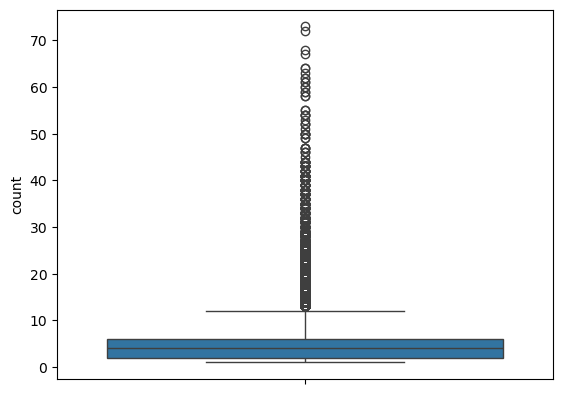

In [178]:
sns.boxplot(df['count'])
plt.show()